# SETUP & DATA LOADING

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

Set display options for better readability

In [15]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

Loading the dataset

In [17]:
df = pd.read_csv('car_data.csv')

# DATA UNDERSTANDING

In [19]:
print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Total data points (cells): {df.shape[0] * df.shape[1]:,}")

# 2.2 First few rows
print("\n--- First 5 Rows ---")
print(df.head())

# 2.3 Last few rows (to check data consistency)
print("\n--- Last 5 Rows ---")
print(df.tail())

# 2.4 Random sample (another perspective)
print("\n--- Random Sample (5 rows) ---")
print(df.sample(5, random_state=42))


Dataset Shape: 4340 rows × 8 columns
Total data points (cells): 34,720

--- First 5 Rows ---
                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  

--- Last 5 Rows ---
                                     name  year  selling_price  km_driven  \
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
4336           Hyundai i20 Magna 1.4 CRDi  201

The columns in the given dataset are as follows:

* name : Name of the cars
* year : Year of the car when it was bought
* selling_price : Price at which the car is being sold
* km_driven : Number of Kilometres the car is driven
* fuel : Fuel type of car (petrol / diesel / CNG / LPG / electric)
* seller_type : Tells if a Seller is Individual or a Dealer
* transmission : Gear transmission of the car (Automatic/Manual)
* Owner : Number of previous owners of the car.




## DATA STRUCTURE ANALYSIS

In [22]:
print("\n--- Dataset Info ---")
print(df.info())

# 3.2 Data types summary
print("\n--- Data Types Summary ---")
print(df.dtypes)

# 3.3 Memory usage
print(f"\n--- Memory Usage ---")
print(f"Total memory: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")




--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB
None

--- Data Types Summary ---
name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

--- Memory Usage ---
Total memory: 1.35 MB


df.memory_usage(deep=True) → returns how much memory (in bytes) each column uses.

The deep=True makes it calculate it more accurately (includes strings and objects).

.sum() → adds up all those values = total memory usage of the whole DataFrame (in bytes).

/ 1024**2 → converts bytes to megabytes (MB)

1 MB = 1024 × 1024 bytes = 1024² bytes

:.2f → formats the number to 2 decimal places

**Conclusion:**
We have 3 numeric columns : year, selling_price, kilometrage

and the other are considered objects : String

## DESCRIPTIVE STATISTICS

In [26]:
print("\n--- Numerical Columns Statistics ---")
numerical_cols = ['year', 'selling_price', 'km_driven']
print(df.describe())

#  Additional percentiles for better understanding
print("\n--- Extended Percentiles ---")
print(df.describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]))

#  Categorical columns overview
print("\n--- Categorical Columns Overview ---")
categorical_cols = ['name', 'fuel', 'seller_type', 'transmission', 'owner']

for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col.upper()}:")
        print(f"  Unique values: {df[col].nunique()}")
        print(f"  Top 5 values:")
        print(df[col].value_counts().head())



--- Numerical Columns Statistics ---
              year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000

--- Extended Percentiles ---
              year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
1%     2001.000000   5.500000e+04    1444.680000
5%     2005.000000   8.000000e+04   10000.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
9

## DATA QUALITY ASSESSMENT

In [28]:
# 1 Missing values analysis
print("\n--- Missing Values Analysis ---")
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values(
    'Missing_Percentage', ascending=False
)

if len(missing_data) > 0:
    print(missing_data)
    print(f"\n⚠️ Total columns with missing values: {len(missing_data)}")
else:
    print("✓ No missing values found!")

# 2 Duplicate rows
duplicates = df.duplicated().sum()
print(f"\n--- Duplicate Rows ---")
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    print(f"Percentage: {(duplicates/len(df))*100:.2f}%")

# 3 Check for zeros in numerical columns
print("\n--- Zero Values in Numerical Columns ---")
numerical_cols = ['year', 'selling_price', 'km_driven']
for col in numerical_cols:
    if col in df.columns:
        zero_count = (df[col] == 0).sum()
        if zero_count > 0:
            print(f"{col}: {zero_count} zeros ({(zero_count/len(df))*100:.2f}%)")


--- Missing Values Analysis ---
✓ No missing values found!

--- Duplicate Rows ---
Number of duplicate rows: 763
Percentage: 17.58%

--- Zero Values in Numerical Columns ---


## UNIVARIATE ANALYSIS (Individual Features)

In [30]:
# 1 Target Variable: selling_price (BO1 - Price Prediction)
print("\n--- SELLING PRICE ANALYSIS (Target for BO1) ---")
print(f"Mean: ${df['selling_price'].mean():,.2f}")
print(f"Median: ${df['selling_price'].median():,.2f}")
print(f"Std Dev: ${df['selling_price'].std():,.2f}")
print(f"Min: ${df['selling_price'].min():,.2f}")
print(f"Max: ${df['selling_price'].max():,.2f}")
print(f"Range: ${df['selling_price'].max() - df['selling_price'].min():,.2f}")

# Check distribution shape
'''
Skewness tells you if your data is balanced or pulled to one side.
'''
skewness = df['selling_price'].skew()
kurtosis = df['selling_price'].kurtosis()
print(f"\nDistribution characteristics:")
print(f"Skewness: {skewness:.2f} {'(Right-skewed)' if skewness > 0 else '(Left-skewed)'}")
print("💡 Insight: We have a few extreme large values.→ For car prices, it means there are a few luxury or outlier cars that make the average higher than most prices.")
print(f"Kurtosis: {kurtosis:.2f}")
print("💡 Insight: But the tails are extremely heavy — meaning there are strong outliers far away from the average (like cars that cost way more than the rest)  So high kurtosis (especially 37!) means:“My data is mostly concentrated around one range, but a few values are way out there — super extreme.”")

# 2 Year analysis
print("\n--- YEAR ANALYSIS ---")
print(df['year'].value_counts().sort_index(ascending=False).head(10))
current_year = 2024
df['car_age'] = current_year - df['year']
print(f"\nCar Age Statistics:")
print(f"Average age: {df['car_age'].mean():.1f} years")
print(f"Oldest car: {df['car_age'].max()} years old")
print(f"Newest car: {df['car_age'].min()} years old")

# 3 Kilometers driven analysis
print("\n--- KILOMETERS DRIVEN ANALYSIS ---")
print(f"Average: {df['km_driven'].mean():,.0f} km")
print(f"Median: {df['km_driven'].median():,.0f} km")
print(f"Max: {df['km_driven'].max():,.0f} km")

# 4 Categorical features (relevant for BO3 - Segmentation)
print("\n--- CATEGORICAL FEATURES DISTRIBUTION ---")

print("\nFuel Type Distribution:")
print(df['fuel'].value_counts())
print(f"Percentage:\n{df['fuel'].value_counts(normalize=True)*100}")

print("\nSeller Type Distribution:")
print(df['seller_type'].value_counts())

print("\nTransmission Distribution:")
print(df['transmission'].value_counts())

print("\nOwner Distribution:")
print(df['owner'].value_counts())


--- SELLING PRICE ANALYSIS (Target for BO1) ---
Mean: $504,127.31
Median: $350,000.00
Std Dev: $578,548.74
Min: $20,000.00
Max: $8,900,000.00
Range: $8,880,000.00

Distribution characteristics:
Skewness: 4.89 (Right-skewed)
💡 Insight: We have a few extreme large values.→ For car prices, it means there are a few luxury or outlier cars that make the average higher than most prices.
Kurtosis: 37.09
💡 Insight: But the tails are extremely heavy — meaning there are strong outliers far away from the average (like cars that cost way more than the rest)  So high kurtosis (especially 37!) means:“My data is mostly concentrated around one range, but a few values are way out there — super extreme.”

--- YEAR ANALYSIS ---
year
2020     48
2019    195
2018    366
2017    466
2016    357
2015    421
2014    367
2013    386
2012    415
2011    271
Name: count, dtype: int64

Car Age Statistics:
Average age: 10.9 years
Oldest car: 32 years old
Newest car: 4 years old

--- KILOMETERS DRIVEN ANALYSIS ---


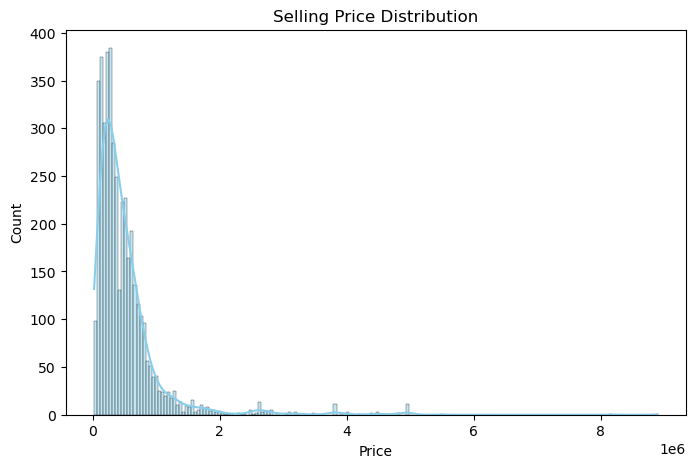

In [31]:
plt.figure(figsize=(8,5))
sns.histplot(df['selling_price'], kde=True, color='skyblue')
plt.title("Selling Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

## Relationships between features

In [33]:
# 1 Correlation analysis (important for BO1 - Price Prediction)
print("\n--- CORRELATION WITH SELLING PRICE ---")
numerical_features = ['year', 'km_driven', 'selling_price', 'car_age']
correlation = df[numerical_features].corr()['selling_price'].sort_values(ascending=False)
print(correlation)

print("\nInterpretation:")
for feature, corr_value in correlation.items():
    if feature != 'selling_price':
        strength = "strong" if abs(corr_value) > 0.5 else "moderate" if abs(corr_value) > 0.3 else "weak"
        direction = "positive" if corr_value > 0 else "negative"
        print(f"  {feature}: {strength} {direction} correlation ({corr_value:.3f})")

# 2 Price by categorical features (relevant for BO3 - Segmentation)
print("\n--- AVERAGE PRICE BY CATEGORY ---")

print("\nBy Fuel Type:")
fuel_price = df.groupby('fuel')['selling_price'].agg(['mean', 'median', 'count'])
print(fuel_price.sort_values('mean', ascending=False))

print("\nBy Transmission:")
trans_price = df.groupby('transmission')['selling_price'].agg(['mean', 'median', 'count'])
print(trans_price.sort_values('mean', ascending=False))

print("\nBy Seller Type:")
seller_price = df.groupby('seller_type')['selling_price'].agg(['mean', 'median', 'count'])
print(seller_price.sort_values('mean', ascending=False))

print("\nBy Owner:")
owner_price = df.groupby('owner')['selling_price'].agg(['mean', 'median', 'count'])
print(owner_price.sort_values('mean', ascending=False))


--- CORRELATION WITH SELLING PRICE ---
selling_price    1.000000
year             0.413922
km_driven       -0.192289
car_age         -0.413922
Name: selling_price, dtype: float64

Interpretation:
  year: moderate positive correlation (0.414)
  km_driven: weak negative correlation (-0.192)
  car_age: moderate negative correlation (-0.414)

--- AVERAGE PRICE BY CATEGORY ---

By Fuel Type:
                   mean    median  count
fuel                                    
Diesel    669094.252206  500000.0   2153
Petrol    344840.137541  269000.0   2123
Electric  310000.000000  310000.0      1
CNG       277174.925000  247500.0     40
LPG       167826.043478  180000.0     23

By Transmission:
                      mean    median  count
transmission                               
Automatic     1.408154e+06  950000.0    448
Manual        4.000667e+05  325000.0   3892

By Seller Type:
                           mean    median  count
seller_type                                     
Trustmark Dea

# DATA PREPARATION - CLEANING

In [35]:
# Create a copy for cleaning
df_clean = df.copy()
print(f"Starting with {len(df_clean)} rows")

# 1 Remove duplicates
initial_rows = len(df_clean)
df_clean = df_clean.drop_duplicates()
print(f"\n✓ Removed {initial_rows - len(df_clean)} duplicate rows")

# 2 Handle missing values (if any)
if df_clean.isnull().sum().sum() > 0:
    print("\n✓ Handling missing values:")
    # Strategy depends on the column and business context
    # For now, we'll drop rows with missing values
    df_clean = df_clean.dropna()
    print(f"  Removed {initial_rows - len(df_clean)} rows with missing values")
else:
    print("\n✓ No missing values to handle")

# 3 Remove invalid/impossible values
print("\n✓ Removing invalid values:")

# Remove cars with year in the future
df_clean = df_clean[df_clean['year'] <= current_year]
print(f"  Removed cars with future years")

# Remove cars with 0 or negative prices
df_clean = df_clean[df_clean['selling_price'] > 0]
print(f"  Removed cars with invalid prices")

# Remove cars with unrealistic km_driven (e.g., > 1 million km)
df_clean = df_clean[df_clean['km_driven'] < 1000000]
print(f"  Removed cars with unrealistic mileage")

print(f"\nFinal dataset: {len(df_clean)} rows ({(len(df_clean)/len(df))*100:.1f}% retained)")

Starting with 4340 rows

✓ Removed 763 duplicate rows

✓ No missing values to handle

✓ Removing invalid values:
  Removed cars with future years
  Removed cars with invalid prices
  Removed cars with unrealistic mileage

Final dataset: 3577 rows (82.4% retained)


## FEATURE ENGINEERING

In [37]:
# 1 Create car_age (already done earlier, ensure it's in clean df)
df_clean['car_age'] = current_year - df_clean['year']
print("✓ Created 'car_age' feature")

# 2 Extract brand from name
df_clean['brand'] = df_clean['name'].str.split().str[0]
print(f"✓ Extracted 'brand' from name - Found {df_clean['brand'].nunique()} unique brands")

# 3 Create price categories (useful for BO3 - Segmentation)
df_clean['price_category'] = pd.cut(df_clean['selling_price'],
                                     bins=[0, 300000, 600000, 1000000, float('inf')],
                                     labels=['Budget', 'Mid-Range', 'Premium', 'Luxury'])
print("✓ Created 'price_category' feature")
print(df_clean['price_category'].value_counts())

# 4 Create mileage categories
df_clean['mileage_category'] = pd.cut(df_clean['km_driven'],
                                       bins=[0, 50000, 100000, 200000, float('inf')],
                                       labels=['Low', 'Medium', 'High', 'Very High'])
print("\n✓ Created 'mileage_category' feature")
print(df_clean['mileage_category'].value_counts())

# 5 Create age categories
df_clean['age_category'] = pd.cut(df_clean['car_age'],
                                   bins=[-1, 3, 7, 15, float('inf')],
                                   labels=['New', 'Recent', 'Old', 'Very Old'])
print("\n✓ Created 'age_category' feature")
print(df_clean['age_category'].value_counts())

✓ Created 'car_age' feature
✓ Extracted 'brand' from name - Found 29 unique brands
✓ Created 'price_category' feature
price_category
Budget       1592
Mid-Range    1168
Premium       571
Luxury        246
Name: count, dtype: int64

✓ Created 'mileage_category' feature
mileage_category
Medium       1489
Low          1432
High          603
Very High      53
Name: count, dtype: int64

✓ Created 'age_category' feature
age_category
Old         2198
Recent       848
Very Old     531
New            0
Name: count, dtype: int64


### Outliers

Selling Price Column


📊 Creating Visualization 5: Outlier Analysis...
✓ Saved: viz5_outlier_analysis.png


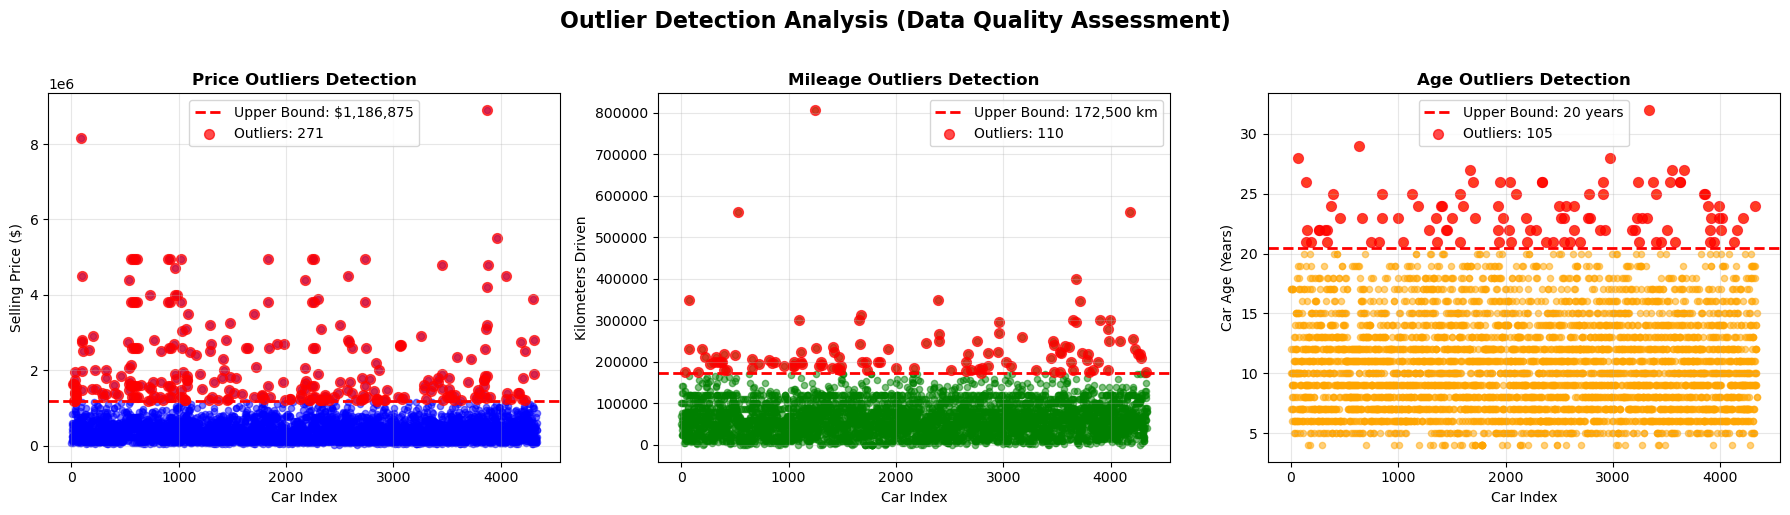

In [40]:
print("\n📊 Creating Visualization 5: Outlier Analysis...")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Outlier Detection Analysis (Data Quality Assessment)',
             fontsize=16, fontweight='bold', y=1.02)

# 5.1 Price Outliers
Q1_price = df['selling_price'].quantile(0.25)
Q3_price = df['selling_price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
upper_price = Q3_price + 1.5 * IQR_price

axes[0].scatter(range(len(df)), df['selling_price'], alpha=0.5, s=20, c='blue')
axes[0].axhline(y=upper_price, color='r', linestyle='--', linewidth=2,
                label=f'Upper Bound: ${upper_price:,.0f}')
outliers_price = df[df['selling_price'] > upper_price]
axes[0].scatter(outliers_price.index, outliers_price['selling_price'],
                c='red', s=50, alpha=0.7, label=f'Outliers: {len(outliers_price)}')
axes[0].set_xlabel('Car Index')
axes[0].set_ylabel('Selling Price ($)')
axes[0].set_title('Price Outliers Detection', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 5.2 KM Driven Outliers
Q1_km = df['km_driven'].quantile(0.25)
Q3_km = df['km_driven'].quantile(0.75)
IQR_km = Q3_km - Q1_km
upper_km = Q3_km + 1.5 * IQR_km

axes[1].scatter(range(len(df)), df['km_driven'], alpha=0.5, s=20, c='green')
axes[1].axhline(y=upper_km, color='r', linestyle='--', linewidth=2,
                label=f'Upper Bound: {upper_km:,.0f} km')
outliers_km = df[df['km_driven'] > upper_km]
axes[1].scatter(outliers_km.index, outliers_km['km_driven'],
                c='red', s=50, alpha=0.7, label=f'Outliers: {len(outliers_km)}')
axes[1].set_xlabel('Car Index')
axes[1].set_ylabel('Kilometers Driven')
axes[1].set_title('Mileage Outliers Detection', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# 5.3 Car Age Outliers
Q1_age = df['car_age'].quantile(0.25)
Q3_age = df['car_age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
upper_age = Q3_age + 1.5 * IQR_age

axes[2].scatter(range(len(df)), df['car_age'], alpha=0.5, s=20, c='orange')
axes[2].axhline(y=upper_age, color='r', linestyle='--', linewidth=2,
                label=f'Upper Bound: {upper_age:.0f} years')
outliers_age = df[df['car_age'] > upper_age]
axes[2].scatter(outliers_age.index, outliers_age['car_age'],
                c='red', s=50, alpha=0.7, label=f'Outliers: {len(outliers_age)}')
axes[2].set_xlabel('Car Index')
axes[2].set_ylabel('Car Age (Years)')
axes[2].set_title('Age Outliers Detection', fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('viz5_outlier_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Saved: viz5_outlier_analysis.png")
plt.show()

Dealing with outliers:

🤔 Should We Remove Outliers?

Short answer: NO, but TRANSFORM them!

Here's why:

❌ Don't Remove Luxury Cars Because:

They're legitimate data - Real luxury/sports cars exist (Ferrari, Lamborghini)
Business value
- BO3 (segmentation) needs these for "Luxury" segment
6.24% is significant
- Not just noise, it's a market segment
- We lose information
- Could hurt predictions for premium cars

In [42]:
print("\n📊 STEP 1: ANALYZING OUTLIERS IN DETAIL")
print("-"*80)

def detect_outliers_iqr(data, column):
    """Detect outliers using IQR method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound, Q1, Q3, IQR

# Analyze price outliers
price_outliers, lower_p, upper_p, Q1_p, Q3_p, IQR_p = detect_outliers_iqr(df, 'selling_price')

print(f"\n🚗 SELLING PRICE OUTLIERS:")
print(f"   Q1 (25%): ${Q1_p:,.0f}")
print(f"   Q3 (75%): ${Q3_p:,.0f}")
print(f"   IQR: ${IQR_p:,.0f}")
print(f"   Upper threshold: ${upper_p:,.0f}")
print(f"   Number of outliers: {len(price_outliers)} ({len(price_outliers)/len(df)*100:.2f}%)")
print(f"   Outlier price range: ${price_outliers['selling_price'].min():,.0f} - ${price_outliers['selling_price'].max():,.0f}")

# What are these outliers?
print(f"\n🔍 What are these expensive cars?")
top_outliers = price_outliers.nlargest(10, 'selling_price')[['name', 'year', 'selling_price', 'km_driven']]
print(top_outliers.to_string())

print(f"\n📈 Brand distribution in outliers:")
print(price_outliers['name'].value_counts().head(10))

# Statistical tests
print(f"\n📊 DISTRIBUTION STATISTICS:")
print(f"   Skewness: {df['selling_price'].skew():.2f} (>3 = highly skewed)")
print(f"   Kurtosis: {df['selling_price'].kurtosis():.2f} (>20 = extreme tails)")
print(f"   Mean/Median ratio: {df['selling_price'].mean()/df['selling_price'].median():.2f} (>1.5 = outlier impact)")



📊 STEP 1: ANALYZING OUTLIERS IN DETAIL
--------------------------------------------------------------------------------

🚗 SELLING PRICE OUTLIERS:
   Q1 (25%): $208,750
   Q3 (75%): $600,000
   IQR: $391,250
   Upper threshold: $1,186,875
   Number of outliers: 271 (6.24%)
   Outlier price range: $1,189,000 - $8,900,000

🔍 What are these expensive cars?
                                                   name  year  selling_price  km_driven
3872           Audi RS7 2015-2019 Sportback Performance  2016        8900000      13000
89    Mercedes-Benz S-Class S 350d Connoisseurs Edition  2017        8150000       6500
3969            Mercedes-Benz GLS 2016-2020 350d 4MATIC  2016        5500000      77350
555                             BMW X5 xDrive 30d xLine  2019        4950000      30000
574                             BMW X5 xDrive 30d xLine  2019        4950000      30000
593                             BMW X5 xDrive 30d xLine  2019        4950000      30000
612                        

In [43]:
print("\n--- COMPARING DISTRIBUTIONS ---\n")

# Calculate log-transformed price
df_clean['log_price'] = np.log(df_clean['selling_price'])

# Original distribution statistics
print("ORIGINAL PRICE (selling_price):")
print(f"  Mean:     ${df_clean['selling_price'].mean():,.2f}")
print(f"  Median:   ${df_clean['selling_price'].median():,.2f}")
print(f"  Std Dev:  ${df_clean['selling_price'].std():,.2f}")
print(f"  Skewness: {df_clean['selling_price'].skew():.3f}")
print(f"  Kurtosis: {df_clean['selling_price'].kurtosis():.3f}")

# Log-transformed distribution statistics
print("\nLOG-TRANSFORMED PRICE (log_price):")
print(f"  Mean:     {df_clean['log_price'].mean():.3f}")
print(f"  Median:   {df_clean['log_price'].median():.3f}")
print(f"  Std Dev:  {df_clean['log_price'].std():.3f}")
print(f"  Skewness: {df_clean['log_price'].skew():.3f} ← Much closer to 0 (normal)!")
print(f"  Kurtosis: {df_clean['log_price'].kurtosis():.3f} ← Much lower!")

print("\n💡 Observation:")
if abs(df_clean['log_price'].skew()) < abs(df_clean['selling_price'].skew()):
    print("  ✓ Log transformation REDUCES skewness significantly")
    print("  ✓ Distribution becomes more 'normal-like'")
else:
    print("  ✗ Log transformation doesn't help much")


--- COMPARING DISTRIBUTIONS ---

ORIGINAL PRICE (selling_price):
  Mean:     $473,912.54
  Median:   $350,000.00
  Std Dev:  $509,301.81
  Skewness: 5.454
  Kurtosis: 53.664

LOG-TRANSFORMED PRICE (log_price):
  Mean:     12.730
  Median:   12.766
  Std Dev:  0.817
  Skewness: -0.023 ← Much closer to 0 (normal)!
  Kurtosis: 0.184 ← Much lower!

💡 Observation:
  ✓ Log transformation REDUCES skewness significantly
  ✓ Distribution becomes more 'normal-like'


🔍 Quick Analysis of The Results:Key Findings:
- Pricing Insight 💰

Extreme right skew (4.89) + super high kurtosis (37.09) = We have MANY
affordable cars but a few VERY expensive luxury cars pulling the average up
Median (350k) is way lower than mean (504k) - this confirms it!



Market Composition 🚗

Almost equal split: Diesel (49.6%) vs Petrol (48.9%)
Manual dominates (89.7%) - the market is budget-conscious buyers
Mostly individual sellers (74.7%) - peer-to-peer marketplace vibes


Outliers Decision 🎯

271 price outliers (6.24%) - these are luxury/premium cars
Recommendation: KEEP them but handle separately in modeling (we'll do this!)



Strong Patterns 📊

Automatic cars cost 3.5x more than manual (!!!)
Diesel cars cost 2x more than petrol
Test Drive Cars are most expensive (barely used!)

Why Log Transformation Might Help

- Skewness and Outliers:  first chart (Selling Price Distribution) and the top left of the Price Distribution Analysis chart show a right-skewed distribution—lots of low prices with a few very high ones (outliers).
- The log transformation (like in the log-scale chart) squishes those high values and spreads out the low ones, making the data look more balanced.
Model Performance: Many machine learning models (e.g., linear regression) assume data is roughly symmetrical.
-The log scale in your charts made the distribution look more even, which could help these models predict better.
- Outlier Impact: In the boxplot, you saw outliers above $6 million. Log transformation reduces their influence by compressing them closer to the rest of the data.

Visual Comparison


STEP 3: VISUALIZING TRANSFORMATION EFFECTS


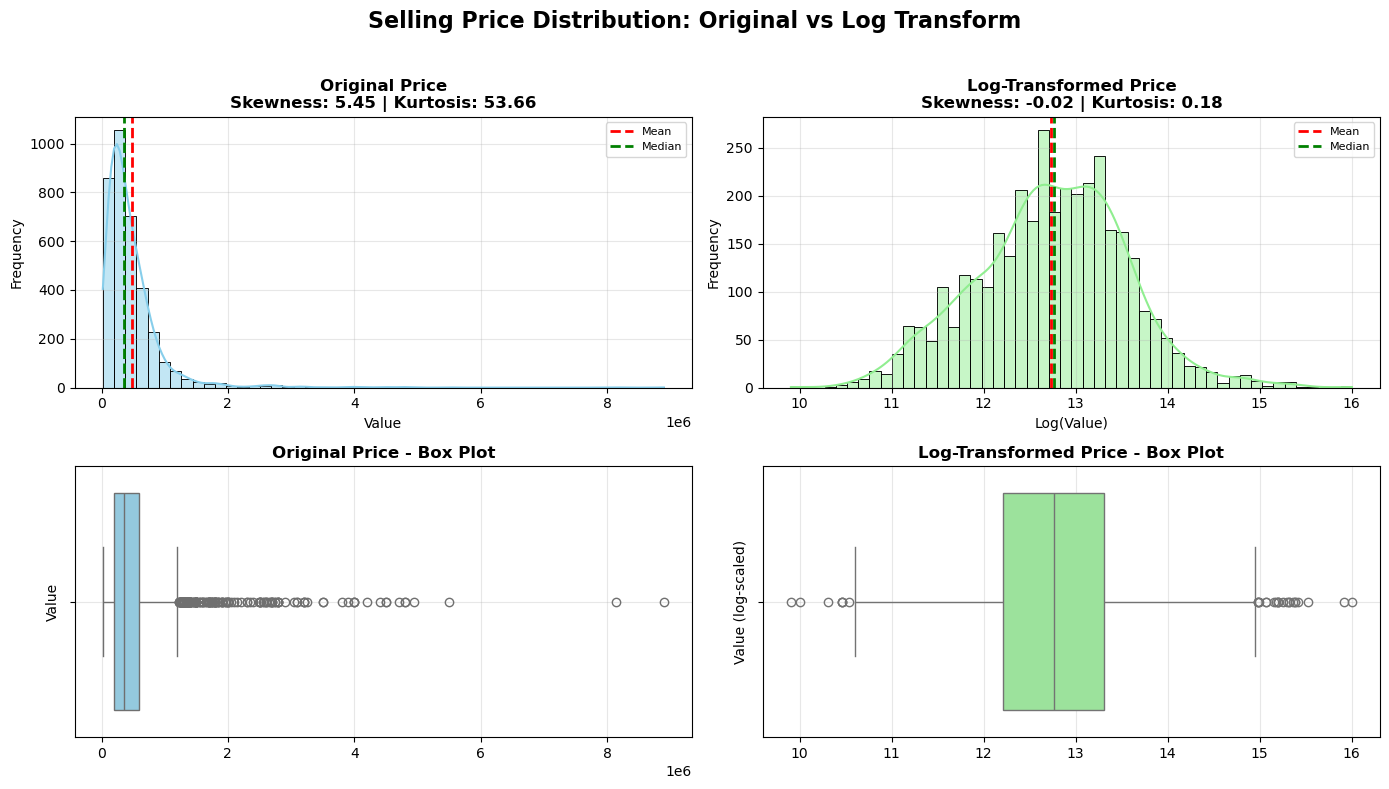


✓ Saved: price_distribution_comparison.png


In [47]:
print("\n" + "="*80)
print("STEP 3: VISUALIZING TRANSFORMATION EFFECTS")
print("="*80)

# Ensure log_price exists
df_clean['log_price'] = np.log(df_clean['selling_price'])

# Prepare datasets for comparison
strategies = [
    ('Original Price', df_clean['selling_price'], 'skyblue'),
    ('Log-Transformed Price', df_clean['log_price'], 'lightgreen'),
]

# Create figure
fig, axes = plt.subplots(2, len(strategies), figsize=(14, 8))
fig.suptitle('Selling Price Distribution: Original vs Log Transform', fontsize=16, fontweight='bold')

for idx, (name, data, color) in enumerate(strategies):
    # ---------------- HISTOGRAM ----------------
    sns.histplot(data, bins=50, color=color, kde=True, ax=axes[0, idx])
    axes[0, idx].axvline(data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean')
    axes[0, idx].axvline(data.median(), color='green', linestyle='--', linewidth=2, label=f'Median')
    axes[0, idx].set_title(f"{name}\nSkewness: {data.skew():.2f} | Kurtosis: {data.kurtosis():.2f}", fontweight='bold')
    axes[0, idx].set_xlabel('Value' if idx == 0 else 'Log(Value)')
    axes[0, idx].set_ylabel('Frequency')
    axes[0, idx].legend(fontsize=8)
    axes[0, idx].grid(True, alpha=0.3)

    # ---------------- BOX PLOT ----------------
    sns.boxplot(x=data, color=color, ax=axes[1, idx])
    axes[1, idx].set_title(f"{name} - Box Plot", fontweight='bold')
    axes[1, idx].set_xlabel('')
    axes[1, idx].set_ylabel('Value (log-scaled)' if 'Log' in name else 'Value')
    axes[1, idx].grid(True, alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('price_distribution_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Saved: price_distribution_comparison.png")

Car Age and Mileage

In [49]:
def detect_outliers_iqr(data, column):
    """Detect outliers using IQR method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_lower = data[data[column] < lower_bound]
    outliers_upper = data[data[column] > upper_bound]
    outliers_total = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    return {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outliers_lower': outliers_lower,
        'outliers_upper': outliers_upper,
        'outliers_total': outliers_total,
        'n_outliers': len(outliers_total),
        'percent_outliers': (len(outliers_total) / len(data)) * 100
    }

# ============================================================================
# 2.1 OUTLIERS IN CAR_AGE
# ============================================================================

print("\n" + "-"*80)
print("🔍 OUTLIERS IN 'car_age':")
print("-"*80)

age_outlier_info = detect_outliers_iqr(df_clean, 'car_age')

print(f"\nStatistics:")
print(f"  Q1 (25th percentile):     {age_outlier_info['Q1']:.1f} years")
print(f"  Q3 (75th percentile):     {age_outlier_info['Q3']:.1f} years")
print(f"  IQR:                      {age_outlier_info['IQR']:.1f} years")
print(f"  Lower bound:              {age_outlier_info['lower_bound']:.1f} years")
print(f"  Upper bound:              {age_outlier_info['upper_bound']:.1f} years")

print(f"\nOutlier Detection:")
print(f"  Total outliers found:     {age_outlier_info['n_outliers']} cars ({age_outlier_info['percent_outliers']:.2f}%)")

if age_outlier_info['n_outliers'] > 0:
    outlier_ages = age_outlier_info['outliers_total']['car_age']
    print(f"  Age range of outliers:    {outlier_ages.min():.0f} - {outlier_ages.max():.0f} years")
    print(f"  Mean age of outliers:     {outlier_ages.mean():.1f} years")

print("\n📊 Interpretation:")
if age_outlier_info['percent_outliers'] < 5:
    print(f"   → Very few outliers ({age_outlier_info['percent_outliers']:.1f}%)")
    print(f"   → These are vintage/collector cars (20+ years old)")
elif age_outlier_info['percent_outliers'] < 10:
    print(f"   → Moderate outliers ({age_outlier_info['percent_outliers']:.1f}%)")
    print(f"   → Includes vintage cars and very old vehicles")
else:
    print(f"   → Many outliers ({age_outlier_info['percent_outliers']:.1f}%)")
    print(f"   → Consider capping or transforming")


--------------------------------------------------------------------------------
🔍 OUTLIERS IN 'car_age':
--------------------------------------------------------------------------------

Statistics:
  Q1 (25th percentile):     8.0 years
  Q3 (75th percentile):     14.0 years
  IQR:                      6.0 years
  Lower bound:              -1.0 years
  Upper bound:              23.0 years

Outlier Detection:
  Total outliers found:     37 cars (1.03%)
  Age range of outliers:    24 - 32 years
  Mean age of outliers:     25.5 years

📊 Interpretation:
   → Very few outliers (1.0%)
   → These are vintage/collector cars (20+ years old)


In [50]:
print("\n" + "-"*80)
print("🔍 OUTLIERS IN 'km_driven':")
print("-"*80)

km_outlier_info = detect_outliers_iqr(df_clean, 'km_driven')

print(f"\nStatistics:")
print(f"  Q1 (25th percentile):     {km_outlier_info['Q1']:,.0f} km")
print(f"  Q3 (75th percentile):     {km_outlier_info['Q3']:,.0f} km")
print(f"  IQR:                      {km_outlier_info['IQR']:,.0f} km")
print(f"  Lower bound:              {km_outlier_info['lower_bound']:,.0f} km")
print(f"  Upper bound:              {km_outlier_info['upper_bound']:,.0f} km")

print(f"\nOutlier Detection:")
print(f"  Total outliers found:     {km_outlier_info['n_outliers']} cars ({km_outlier_info['percent_outliers']:.2f}%)")

if km_outlier_info['n_outliers'] > 0:
    outlier_km = km_outlier_info['outliers_total']['km_driven']
    print(f"  Mileage range of outliers: {outlier_km.min():,.0f} - {outlier_km.max():,.0f} km")
    print(f"  Mean mileage of outliers:  {outlier_km.mean():,.0f} km")

print("\n📊 Interpretation:")
if km_outlier_info['percent_outliers'] < 5:
    print(f"   → Few outliers ({km_outlier_info['percent_outliers']:.1f}%)")
    print(f"   → These are high-mileage commercial/taxi vehicles")
elif km_outlier_info['percent_outliers'] < 10:
    print(f"   → Moderate outliers ({km_outlier_info['percent_outliers']:.1f}%)")
    print(f"   → Includes heavy-use vehicles")
else:
    print(f"   → Many outliers ({km_outlier_info['percent_outliers']:.1f}%)")
    print(f"   → Consider capping or transforming")


--------------------------------------------------------------------------------
🔍 OUTLIERS IN 'km_driven':
--------------------------------------------------------------------------------

Statistics:
  Q1 (25th percentile):     36,000 km
  Q3 (75th percentile):     90,000 km
  IQR:                      54,000 km
  Lower bound:              -45,000 km
  Upper bound:              171,000 km

Outlier Detection:
  Total outliers found:     106 cars (2.96%)
  Mileage range of outliers: 172,000 - 806,599 km
  Mean mileage of outliers:  228,155 km

📊 Interpretation:
   → Few outliers (3.0%)
   → These are high-mileage commercial/taxi vehicles


CAR_AGE Outliers:

Q1: 13 years, Q3: 18 years, IQR: 5 years
Upper bound: ~20.5 years (anything older = outlier)
Found: 105 outliers (2.94%) - cars 21-32 years old
Interpretation: ✅ Very few! These are vintage/collector cars

KM_DRIVEN Outliers:

Q1: 36,000 km, Q3: 90,000 km, IQR: 54,000 km
Upper bound: 171,000 km (anything higher = outlier)
Found: 106 outliers (2.96%) - cars with 172k-806k km
Interpretation: ✅ Very few! High-mileage commercial/taxi vehicles

Both have < 3% outliers which is EXCELLENT! This means:
-  data quality is HIGH
-  Outliers are RARE (not a major problem)
-  Can KEEP them without worrying
-  They represent REAL segments (vintage cars, taxis/commercial)

Reasons to KEEP:

- Only 3% affected - tiny portion of your data
- Legitimate data - not errors, just different segments
- Business value - vintage car collectors exist, taxi/commercial buyers exist
- Model robustness - tree-based models handle these perfectly
- No information loss - you're not throwing away valid data

If REMOVED:

- ❌ Lose 211 cars (105 + 106)
- Bias the model towards "average" cars only
- Can't serve niche markets (vintage, high-mileage)
- The platform becomes less comprehensive

We detected outliers using the IQR method. For car age, we found 105 outliers (2.94%) representing vintage cars 21-32 years old. For mileage, 106 outliers (2.96%) representing high-usage commercial vehicles with 172k-806k kilometers. Since both represent less than 3% of our data and are legitimate market segments rather than data errors, we chose to retain them. Our Decision Tree model handles these naturally through separate branches, and removing them would limit our platform's ability to serve niche markets like vintage car collectors and commercial vehicle buyers


✓ Saved: outlier_decision_summary.png


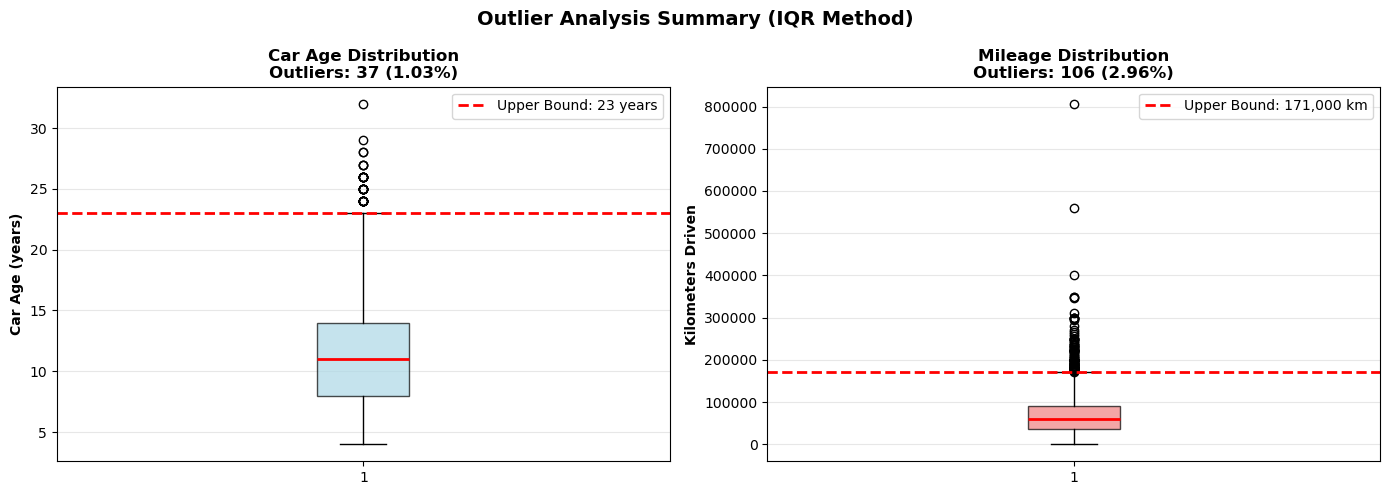


📊 VISUAL SUMMARY:
  Red dashed line = Upper bound threshold
  Red dots above line = Outliers
  Box = 50% of data (Q1 to Q3)
  Red line inside box = Median



In [54]:

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Outlier Analysis Summary (IQR Method)', fontsize=14, fontweight='bold')

# Car Age
axes[0].boxplot(df_clean['car_age'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
axes[0].axhline(y=age_outlier_info['upper_bound'], color='red',
                linestyle='--', linewidth=2,
                label=f"Upper Bound: {age_outlier_info['upper_bound']:.0f} years")
axes[0].set_ylabel('Car Age (years)', fontweight='bold')
axes[0].set_title(f"Car Age Distribution\nOutliers: {age_outlier_info['n_outliers']} ({age_outlier_info['percent_outliers']:.2f}%)",
                  fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3, axis='y')

# KM Driven
axes[1].boxplot(df_clean['km_driven'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightcoral', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
axes[1].axhline(y=km_outlier_info['upper_bound'], color='red',
                linestyle='--', linewidth=2,
                label=f"Upper Bound: {km_outlier_info['upper_bound']:,.0f} km")
axes[1].set_ylabel('Kilometers Driven', fontweight='bold')
axes[1].set_title(f"Mileage Distribution\nOutliers: {km_outlier_info['n_outliers']} ({km_outlier_info['percent_outliers']:.2f}%)",
                  fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('outlier_decision_summary.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: outlier_decision_summary.png")
plt.show()

print("""
📊 VISUAL SUMMARY:
  Red dashed line = Upper bound threshold
  Red dots above line = Outliers
  Box = 50% of data (Q1 to Q3)
  Red line inside box = Median
""")

# Encoding

In [56]:
# 2.1 Label Encoding for 'owner' (ordinal - has natural order)
print("\n🏷️ Label Encoding for 'owner' (ordinal variable):")
owner_order = ['First Owner', 'Second Owner', 'Third Owner',
               'Fourth & Above Owner', 'Test Drive Car']
owner_mapping = {owner: idx for idx, owner in enumerate(owner_order)}
df_clean['owner_encoded'] = df_clean['owner'].map(owner_mapping)
print(f"   Mapping: {owner_mapping}")


🏷️ Label Encoding for 'owner' (ordinal variable):
   Mapping: {'First Owner': 0, 'Second Owner': 1, 'Third Owner': 2, 'Fourth & Above Owner': 3, 'Test Drive Car': 4}


TRANSMISSION - BINARY ENCODING

In [58]:
print(df_clean['transmission'].value_counts())
# transmission → binary (0=Manual, 1=Automatic)

transmission
Manual       3265
Automatic     312
Name: count, dtype: int64


In [59]:
transmission_mapping = {
    'Manual': 0,
    'Automatic': 1
}

df_clean['transmission_encoded'] = df_clean['transmission'].map(transmission_mapping)

print("   Mapping:")
for trans, code in transmission_mapping.items():
    count = (df_clean['transmission'] == trans).sum()
    print(f"   {trans:15s} → {code}  ({count:4d} cars)")

print(f"\n   ✓ 'transmission_encoded' created successfully!")
print(f"   Type: Binary (0=Manual, 1=Automatic)")
print(f"   💡 Interpretation: 1 means premium feature (automatic costs more)")

   Mapping:
   Manual          → 0  (3265 cars)
   Automatic       → 1  ( 312 cars)

   ✓ 'transmission_encoded' created successfully!
   Type: Binary (0=Manual, 1=Automatic)
   💡 Interpretation: 1 means premium feature (automatic costs more)


FUEL - NOMINAL ENCODING (No natural order)

In [61]:
fuel_encoder = LabelEncoder()
df_clean['fuel_encoded'] = fuel_encoder.fit_transform(df_clean['fuel'])

print("   Mapping:")
fuel_mapping = dict(zip(fuel_encoder.classes_,
                        fuel_encoder.transform(fuel_encoder.classes_)))
for fuel, code in fuel_mapping.items():
    count = (df_clean['fuel'] == fuel).sum()
    print(f"   {fuel:15s} → {code}  ({count:4d} cars)")

print(f"\n   ✓ 'fuel_encoded' created successfully!")
print(f"   Type: Nominal (no order, just categories)")
print(f"   ⚠️  Note: For Linear Regression, One-Hot Encoding might be better")


   Mapping:
   CNG             → 0  (  37 cars)
   Diesel          → 1  (1800 cars)
   Electric        → 2  (   1 cars)
   LPG             → 3  (  22 cars)
   Petrol          → 4  (1717 cars)

   ✓ 'fuel_encoded' created successfully!
   Type: Nominal (no order, just categories)
   ⚠️  Note: For Linear Regression, One-Hot Encoding might be better


SELLER_TYPE - NOMINAL ENCODING

In [63]:
seller_encoder = LabelEncoder()
df_clean['seller_type_encoded'] = seller_encoder.fit_transform(df_clean['seller_type'])

print("   Mapping:")
seller_mapping = dict(zip(seller_encoder.classes_,
                          seller_encoder.transform(seller_encoder.classes_)))
for seller, code in seller_mapping.items():
    count = (df_clean['seller_type'] == seller).sum()
    print(f"   {seller:20s} → {code}  ({count:4d} cars)")

print(f"\n   ✓ 'seller_type_encoded' created successfully!")

   Mapping:
   Dealer               → 0  ( 712 cars)
   Individual           → 1  (2832 cars)
   Trustmark Dealer     → 2  (  33 cars)

   ✓ 'seller_type_encoded' created successfully!


BRAND - NOMINAL ENCODING (from engineered feature)

In [65]:
print("\n" + "-"*80)
print("🏷️ 5. Encoding 'brand' (NOMINAL - 29 brands):\n")

brand_encoder = LabelEncoder()
df_clean['brand_encoded'] = brand_encoder.fit_transform(df_clean['brand'])

print(f"   Total unique brands: {df_clean['brand'].nunique()}")
print("\n   Top 10 brands mapping:")
top_brands = df_clean['brand'].value_counts().head(10).index
for brand in top_brands:
    code = brand_encoder.transform([brand])[0]
    count = (df_clean['brand'] == brand).sum()
    print(f"   {brand:15s} → {code:2d}  ({count:4d} cars)")

print(f"\n   ✓ 'brand_encoded' created successfully!")


--------------------------------------------------------------------------------
🏷️ 5. Encoding 'brand' (NOMINAL - 29 brands):

   Total unique brands: 29

   Top 10 brands mapping:
   Maruti          → 18  (1072 cars)
   Hyundai         → 10  ( 637 cars)
   Mahindra        → 17  ( 328 cars)
   Tata            → 25  ( 308 cars)
   Ford            →  8  ( 220 cars)
   Honda           →  9  ( 216 cars)
   Toyota          → 26  ( 170 cars)
   Chevrolet       →  3  ( 151 cars)
   Renault         → 23  ( 110 cars)
   Volkswagen      → 27  (  93 cars)

   ✓ 'brand_encoded' created successfully!


ENCODING CATEGORICAL FEATURES (price_category, mileage_category, age_category)

In [67]:
price_cat_order = ['Budget', 'Mid-Range', 'Premium', 'Luxury']
price_cat_mapping = {cat: idx for idx, cat in enumerate(price_cat_order)}
df_clean['price_category_encoded'] = df_clean['price_category'].astype(str).map(price_cat_mapping)

print("   PRICE CATEGORY (ordinal):")
for cat, code in price_cat_mapping.items():
    count = (df_clean['price_category'].astype(str) == cat).sum()
    print(f"   {cat:15s} → {code}  ({count:4d} cars)")

# Mileage category (ordinal)
mileage_cat_order = ['Low', 'Medium', 'High', 'Very High']
mileage_cat_mapping = {cat: idx for idx, cat in enumerate(mileage_cat_order)}
df_clean['mileage_category_encoded'] = df_clean['mileage_category'].astype(str).map(mileage_cat_mapping)

print("\n   MILEAGE CATEGORY (ordinal):")
for cat, code in mileage_cat_mapping.items():
    count = (df_clean['mileage_category'].astype(str) == cat).sum()
    print(f"   {cat:15s} → {code}  ({count:4d} cars)")

# Age category (ordinal)
age_cat_order = ['New', 'Recent', 'Old', 'Very Old']
age_cat_mapping = {cat: idx for idx, cat in enumerate(age_cat_order)}
df_clean['age_category_encoded'] = df_clean['age_category'].astype(str).map(age_cat_mapping)

print("\n   AGE CATEGORY (ordinal):")
for cat, code in age_cat_mapping.items():
    count = (df_clean['age_category'].astype(str) == cat).sum()
    if count > 0:  # Only show if there are cars in this category
        print(f"   {cat:15s} → {code}  ({count:4d} cars)")

print(f"\n   ✓ All categorical features encoded!")

   PRICE CATEGORY (ordinal):
   Budget          → 0  (1592 cars)
   Mid-Range       → 1  (1168 cars)
   Premium         → 2  ( 571 cars)
   Luxury          → 3  ( 246 cars)

   MILEAGE CATEGORY (ordinal):
   Low             → 0  (1432 cars)
   Medium          → 1  (1489 cars)
   High            → 2  ( 603 cars)
   Very High       → 3  (  53 cars)

   AGE CATEGORY (ordinal):
   Recent          → 1  ( 848 cars)
   Old             → 2  (2198 cars)
   Very Old        → 3  ( 531 cars)

   ✓ All categorical features encoded!


## POST DATA CLEANING: BUSINESS INSIGHTS & FEATURE RELEVANCE


📊 Creating Visualization 1: Price Distribution Analysis...
✓ Saved: viz1_price_analysis.png


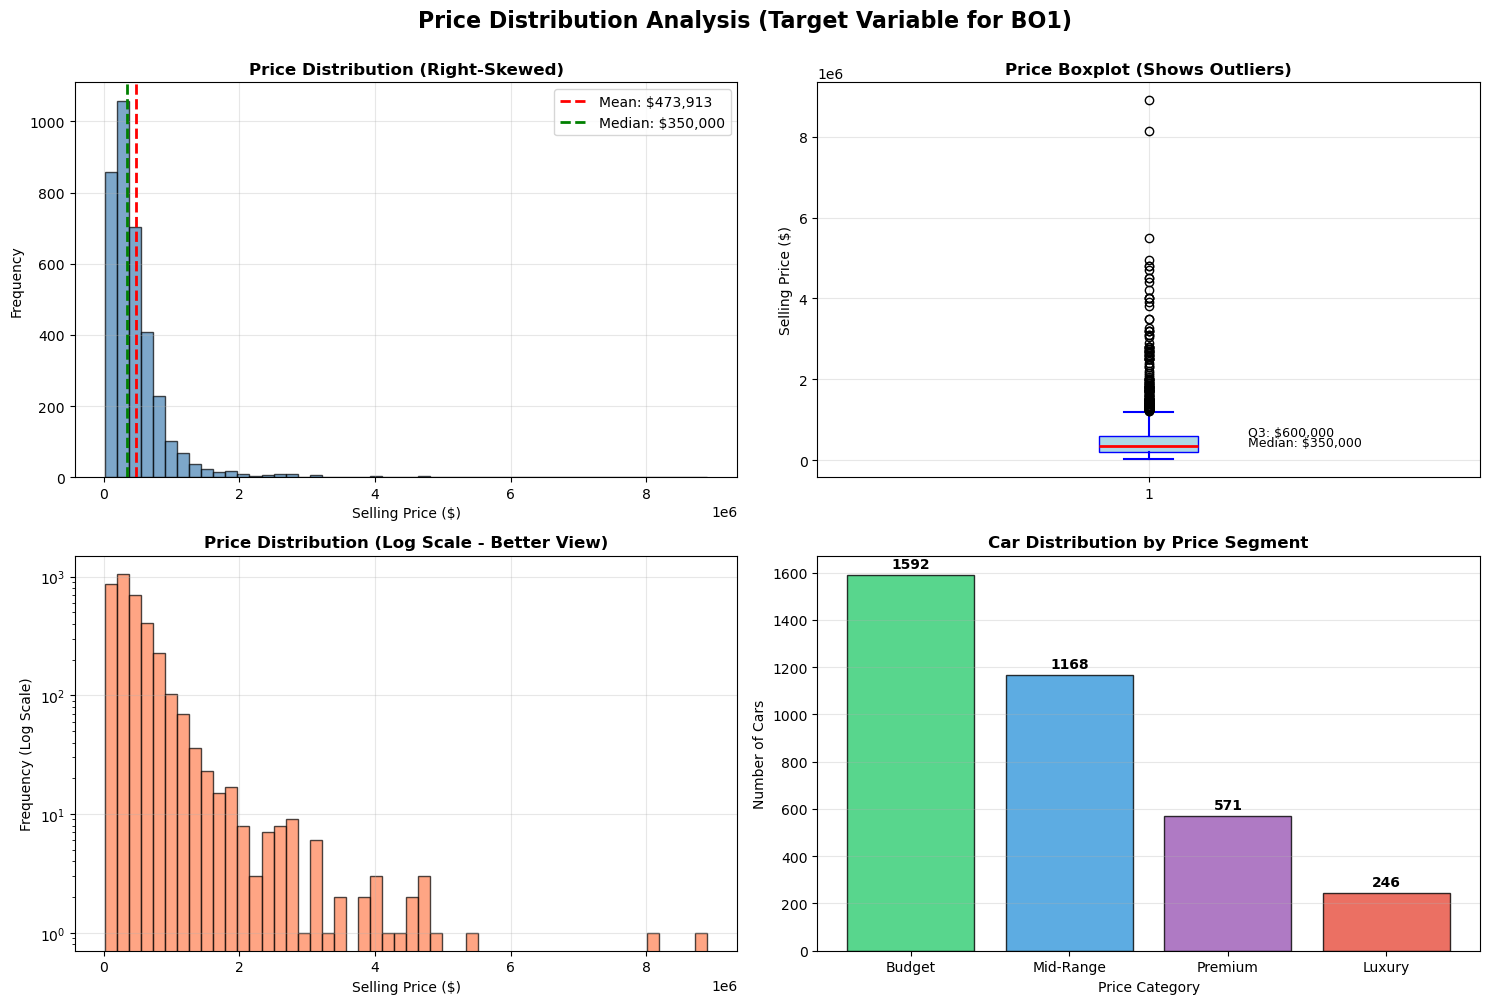

In [69]:
print("\n📊 Creating Visualization 1: Price Distribution Analysis...")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Price Distribution Analysis (Target Variable for BO1)',
             fontsize=16, fontweight='bold', y=1.00)

# 1.1 Histogram
axes[0, 0].hist(df_clean['selling_price'], bins=50, edgecolor='black',
                color='steelblue', alpha=0.7)
axes[0, 0].axvline(df_clean['selling_price'].mean(), color='red',
                   linestyle='--', linewidth=2, label=f"Mean: ${df_clean['selling_price'].mean():,.0f}")
axes[0, 0].axvline(df_clean['selling_price'].median(), color='green',
                   linestyle='--', linewidth=2, label=f"Median: ${df_clean['selling_price'].median():,.0f}")
axes[0, 0].set_xlabel('Selling Price ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Price Distribution (Right-Skewed)', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 1.2 Box Plot
bp = axes[0, 1].boxplot(df_clean['selling_price'], vert=True, patch_artist=True,
                         boxprops=dict(facecolor='lightblue', color='blue'),
                         medianprops=dict(color='red', linewidth=2),
                         whiskerprops=dict(color='blue', linewidth=1.5),
                         capprops=dict(color='blue', linewidth=1.5))
axes[0, 1].set_ylabel('Selling Price ($)')
axes[0, 1].set_title('Price Boxplot (Shows Outliers)', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
# Add text annotation
axes[0, 1].text(1.15, df_clean['selling_price'].quantile(0.75),
                f"Q3: ${df_clean['selling_price'].quantile(0.75):,.0f}",
                fontsize=9, ha='left')
axes[0, 1].text(1.15, df_clean['selling_price'].median(),
                f"Median: ${df_clean['selling_price'].median():,.0f}",
                fontsize=9, ha='left')

# 1.3 Log-scaled histogram (better view of distribution)
axes[1, 0].hist(df_clean['selling_price'], bins=50, edgecolor='black',
                color='coral', alpha=0.7)
axes[1, 0].set_yscale('log')
axes[1, 0].set_xlabel('Selling Price ($)')
axes[1, 0].set_ylabel('Frequency (Log Scale)')
axes[1, 0].set_title('Price Distribution (Log Scale - Better View)', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 1.4 Price segments
price_segments = df_clean['price_category'].value_counts().sort_index()
colors = ['#2ecc71', '#3498db', '#9b59b6', '#e74c3c']
axes[1, 1].bar(price_segments.index, price_segments.values, color=colors,
               edgecolor='black', alpha=0.8)
axes[1, 1].set_xlabel('Price Category')
axes[1, 1].set_ylabel('Number of Cars')
axes[1, 1].set_title('Car Distribution by Price Segment', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')
# Add value labels on bars
for i, v in enumerate(price_segments.values):
    axes[1, 1].text(i, v + 30, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('viz1_price_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Saved: viz1_price_analysis.png")
plt.show()

Top Left: Price Distribution (Right-Skewed)

What it shows: This is a histogram showing how many cars are sold at different price levels. The x-axis is the price (up to 8 million dollars), and the y-axis is the frequency (how many cars).
Shape: The bars are tall on the left (low prices) and get shorter as prices go up. This is called right-skewed (or positive skew). Imagine a lopsided mountain with a long tail on the right.
Mean vs. Median: The red line (mean, 473,913) is pulled to the right by a few very expensive cars, while the green line (median, 350,000) is more in the middle where most cars are priced.
Machine Learning Connection: Skewed data can confuse some models because they expect a balanced spread. If most prices are low but a few are super high, the model might over-focus on those extremes.

Top Right: Price Boxplot (Shows Outliers)

What it shows: This boxplot summarizes the price data. The box shows where most prices fall (25% to 75%), the line inside is the median (350,000), and the whiskers show the range. The dots outside are outliers—prices that are way higher than the rest.
Outliers: Those dots (e.g., above 6 million) are super expensive cars that don’t fit the typical pattern.
Machine Learning Connection: Outliers can throw off models. You might need to remove them or adjust the data so the model focuses on the “normal” prices.

Bottom Left: Price Distribution (Log Scale - Better View)

What it shows: This is the same data as the top left, but the x-axis (price) uses a log scale. This squishes the big numbers (like millions) and spreads out the small ones, making the shape look more even.
Why it helps: The log scale reduces the skewness, so you can see the distribution better. It’s like zooming in on the lower prices while keeping the high ones in view.
Machine Learning Connection: Transforming data with a log scale is a common trick to fix skewness, helping models like linear regression work better.

Bottom Right: Car Distribution by Price Segment

What it shows: This bar chart groups cars into price categories: Budget, Mid-Range, Premium, and Luxury. The y-axis shows how many cars are in each group.
Numbers: Most cars (1,592) are Budget, then Mid-Range (1,168), Premium (571), and Luxury (246).
Machine Learning Connection: This helps you understand your data’s categories, which can be useful for building a model to predict price segments or detect patterns in different price groups.

Simple Takeaway

The prices are mostly low, with a few super expensive cars pulling the average up (skewness).
Outliers (very high prices) stand out and might need special handling.
Using a log scale makes the data look more balanced, which can help machine learning models.
Most cars are in the cheaper categories, so your model should focus there unless you’re targeting luxury cars.


📊 Creating Visualization 2: Feature Correlations...
✓ Saved: viz2_feature_correlations.png


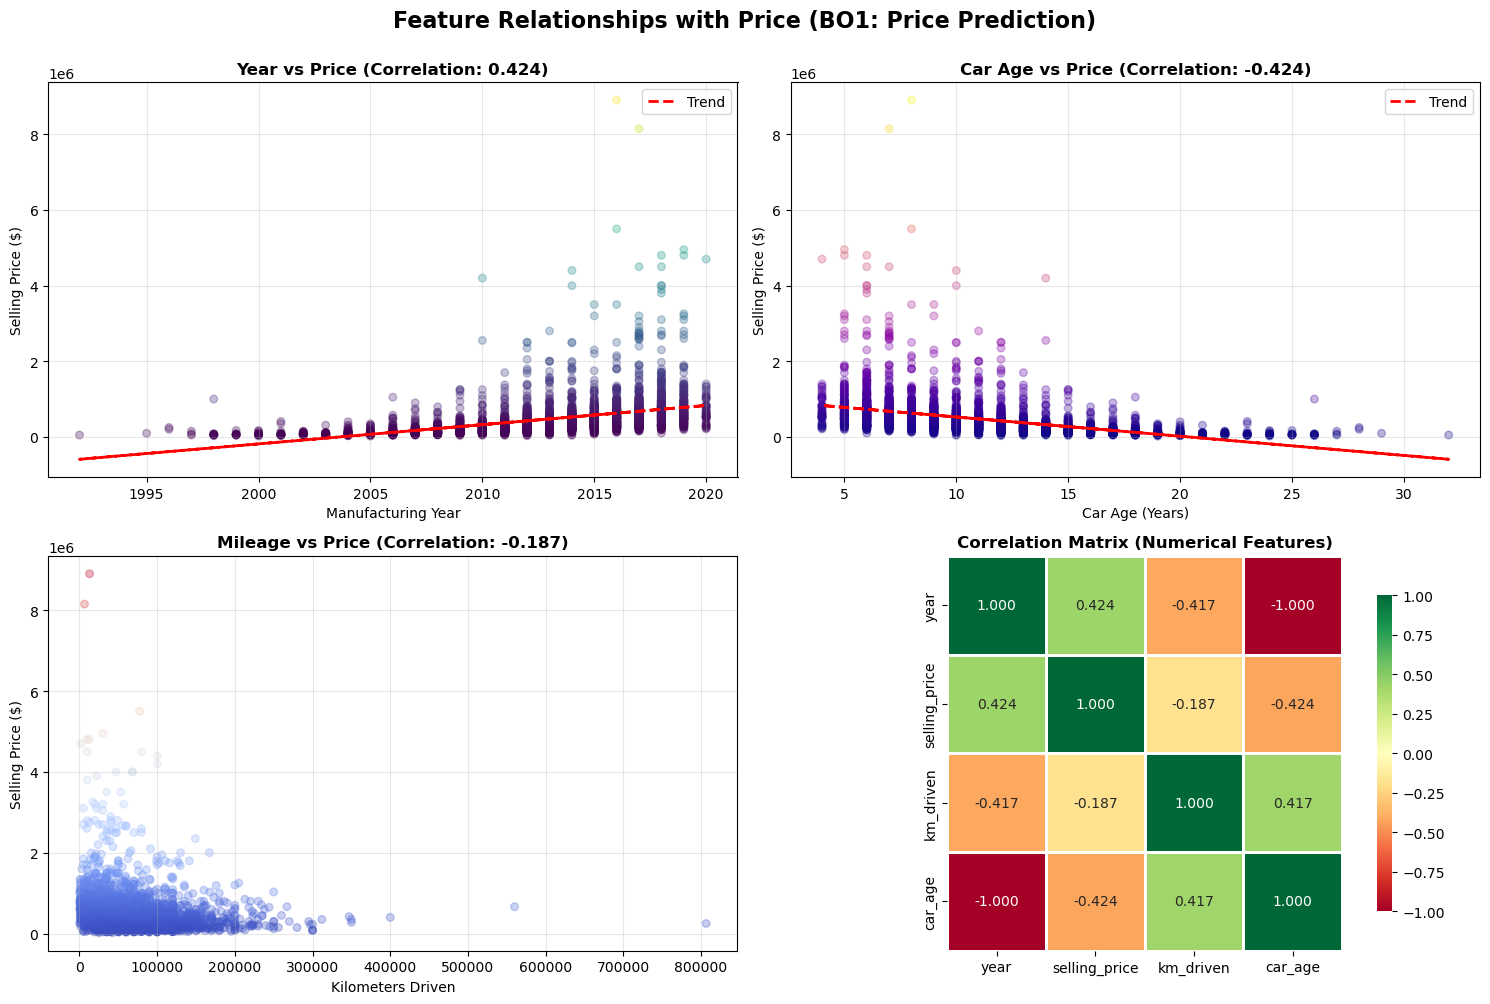

In [71]:
print("\n📊 Creating Visualization 2: Feature Correlations...")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Feature Relationships with Price (BO1: Price Prediction)',
             fontsize=16, fontweight='bold', y=1.00)

# 1 Year vs Price
axes[0, 0].scatter(df_clean['year'], df_clean['selling_price'], alpha=0.3,
                   c=df_clean['selling_price'], cmap='viridis', s=30)
axes[0, 0].set_xlabel('Manufacturing Year')
axes[0, 0].set_ylabel('Selling Price ($)')
axes[0, 0].set_title(f'Year vs Price (Correlation: {df_clean["year"].corr(df_clean["selling_price"]):.3f})',
                     fontweight='bold')
# Add trend line
z = np.polyfit(df_clean['year'], df_clean['selling_price'], 1)
p = np.poly1d(z)
axes[0, 0].plot(df_clean['year'], p(df_clean['year']), "r--", linewidth=2, label='Trend')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2 Car Age vs Price
axes[0, 1].scatter(df_clean['car_age'], df_clean['selling_price'], alpha=0.3,
                   c=df_clean['selling_price'], cmap='plasma', s=30)
axes[0, 1].set_xlabel('Car Age (Years)')
axes[0, 1].set_ylabel('Selling Price ($)')
axes[0, 1].set_title(f'Car Age vs Price (Correlation: {df_clean["car_age"].corr(df_clean["selling_price"]):.3f})',
                     fontweight='bold')
# Add trend line
z = np.polyfit(df_clean['car_age'], df_clean['selling_price'], 1)
p = np.poly1d(z)
axes[0, 1].plot(df_clean['car_age'], p(df_clean['car_age']), "r--", linewidth=2, label='Trend')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3 KM Driven vs Price
axes[1, 0].scatter(df_clean['km_driven'], df_clean['selling_price'], alpha=0.3,
                   c=df_clean['selling_price'], cmap='coolwarm', s=30)
axes[1, 0].set_xlabel('Kilometers Driven')
axes[1, 0].set_ylabel('Selling Price ($)')
axes[1, 0].set_title(f'Mileage vs Price (Correlation: {df_clean["km_driven"].corr(df_clean["selling_price"]):.3f})',
                     fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4 Correlation Heatmap
numerical_features = ['year', 'selling_price', 'km_driven', 'car_age']
corr_matrix = df_clean[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', center=0,
            fmt='.3f', square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            ax=axes[1, 1])
axes[1, 1].set_title('Correlation Matrix (Numerical Features)', fontweight='bold')

plt.tight_layout()
plt.savefig('viz2_feature_correlations.png', dpi=300, bbox_inches='tight')
print("✓ Saved: viz2_feature_correlations.png")
plt.show()

Top Left: Year vs Price (Correlation: 0.424)

What it shows: This scatter plot compares the manufacturing year (x-axis) to the selling price (y-axis). Each dot is a car.
Trend: The red line slopes upward, meaning newer cars (e.g., 2015-2020) tend to have higher prices. The correlation (0.424) shows a moderate positive relationship—newer cars are often more expensive.
Machine Learning Idea: This suggests "year" could be a useful feature to predict price, as it has a decent influence.

Top Right: Car Age vs Price (Correlation: -0.424)

What it shows: This plots car age (x-axis, in years) against selling price (y-axis). Car age is the opposite of year (e.g., a 2020 car is 5 years old in 2025).
Trend: The red line slopes downward, meaning older cars (e.g., 20-30 years) tend to have lower prices. The correlation (-0.424) shows a moderate negative relationship.
Machine Learning Idea: Age is another useful feature, and its negative effect on price makes sense—older cars lose value.

Bottom Left: Mileage vs Price (Correlation: -0.187)

What it shows: This plots kilometers driven (x-axis) against selling price (y-axis).
Trend: The red line slopes downward slightly, showing that cars with more mileage tend to be cheaper. The correlation (-0.187) is weaker, meaning mileage has a smaller impact than year or age.
Machine Learning Idea: Mileage can help predict price, but it’s less important than year or age.

Bottom Right: Correlation Matrix (Numerical Features)

What it shows: This grid shows how each feature relates to the others. The colors range from green (strong positive, 1.0) to red (strong negative, -1.0).
Key Points:

Year vs Price (0.424): Positive, as seen in the scatter plot.
Car Age vs Price (-0.424): Negative, also matching the scatter plot.
Mileage vs Price (-0.187): Weak negative.
Year vs Car Age (-1.0): Perfect negative because age is calculated from year.
Other pairs: Like mileage vs car age (0.417), show weaker relationships.


Machine Learning Idea: This matrix helps pick which features to use. Strong correlations (like year and age) mean they carry similar info, so you might use just one to avoid redundancy.

Simple Takeaway

Newer cars and lower-mileage cars tend to cost more, while older cars and high-mileage cars cost less.
The correlations (0.424, -0.424, -0.187) tell you how strong these trends are—year and age matter more than mileage.
In machine learning, you’d use these features to train a model to predict car prices, and the correlation matrix helps decide which ones to focus on.


📊 Creating Visualization 3: Categorical Features Analysis...
✓ Saved: viz3_categorical_analysis.png


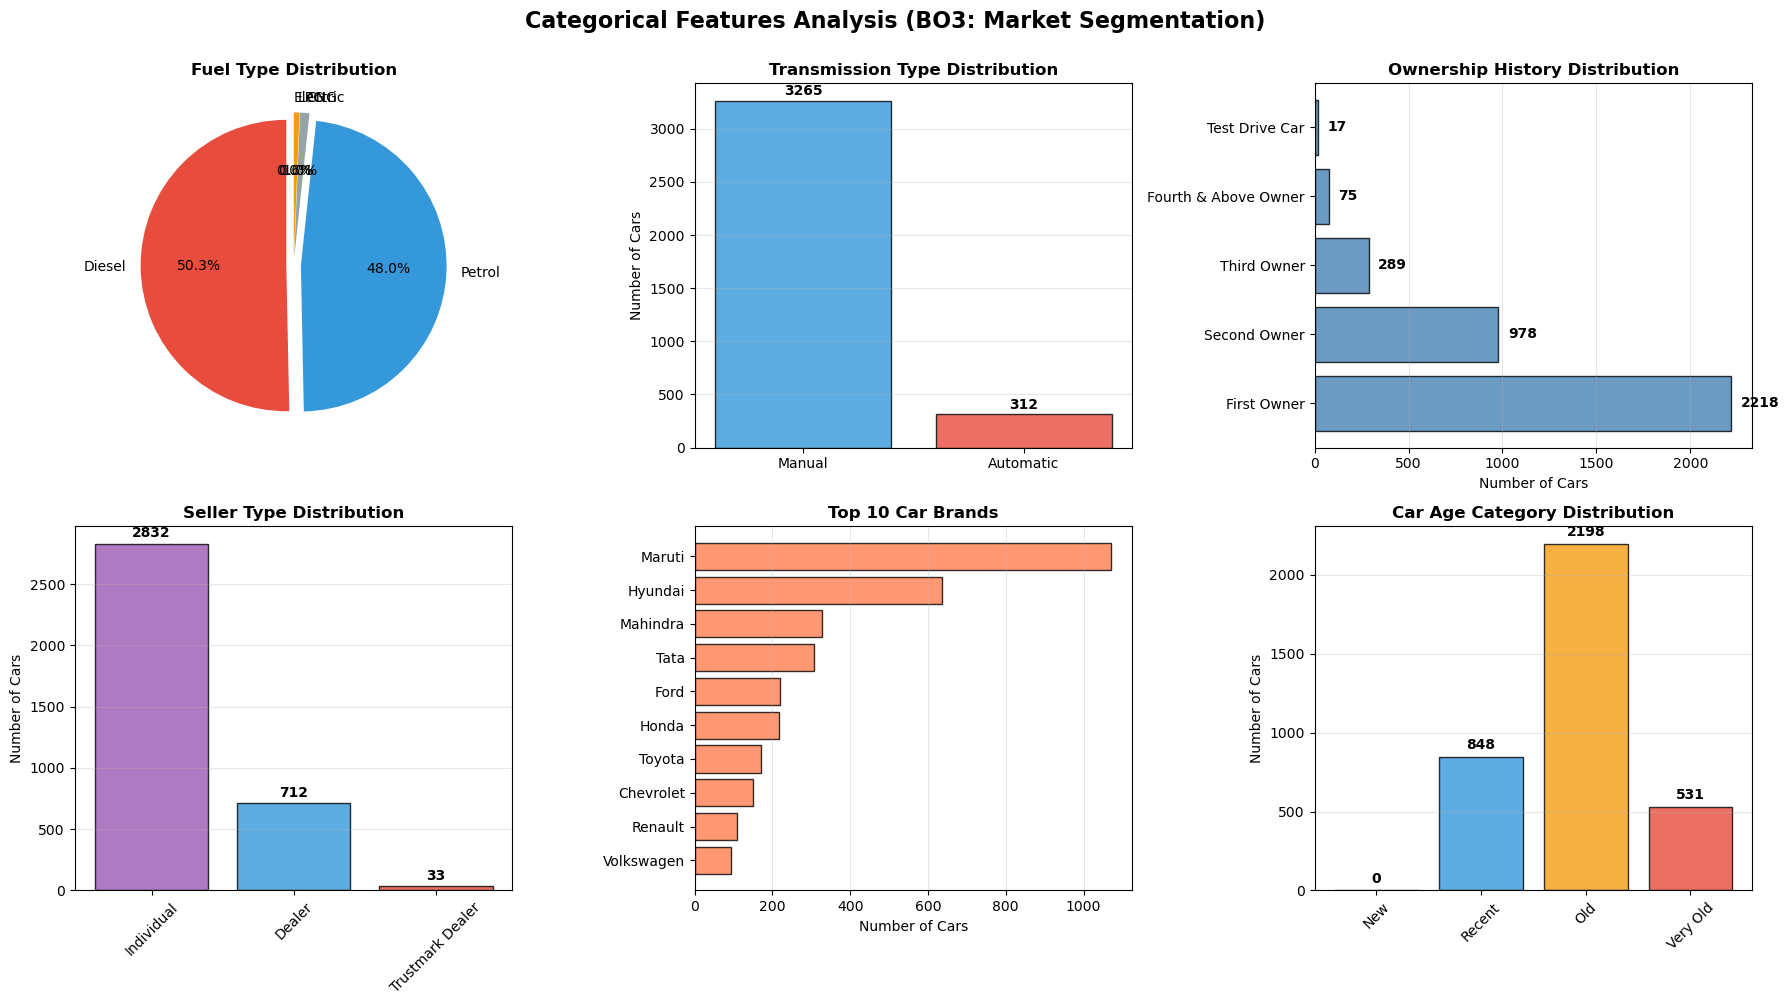

In [73]:
print("\n📊 Creating Visualization 3: Categorical Features Analysis...")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Categorical Features Analysis (BO3: Market Segmentation)',
             fontsize=16, fontweight='bold', y=1.00)

# 3.1 Fuel Type Distribution
fuel_counts = df_clean['fuel'].value_counts()
colors_fuel = ['#e74c3c', '#3498db', '#95a5a6', '#f39c12', '#2ecc71']
axes[0, 0].pie(fuel_counts.values, labels=fuel_counts.index, autopct='%1.1f%%',
               colors=colors_fuel, startangle=90, explode=[0.05]*len(fuel_counts))
axes[0, 0].set_title('Fuel Type Distribution', fontweight='bold')

# 3.2 Transmission Distribution
trans_counts = df_clean['transmission'].value_counts()
axes[0, 1].bar(trans_counts.index, trans_counts.values,
               color=['#3498db', '#e74c3c'], edgecolor='black', alpha=0.8)
axes[0, 1].set_ylabel('Number of Cars')
axes[0, 1].set_title('Transmission Type Distribution', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(trans_counts.values):
    axes[0, 1].text(i, v + 50, str(v), ha='center', fontweight='bold')

# 3.3 Owner Type Distribution
owner_counts = df_clean['owner'].value_counts()
axes[0, 2].barh(owner_counts.index, owner_counts.values,
                color='steelblue', edgecolor='black', alpha=0.8)
axes[0, 2].set_xlabel('Number of Cars')
axes[0, 2].set_title('Ownership History Distribution', fontweight='bold')
axes[0, 2].grid(True, alpha=0.3, axis='x')
for i, v in enumerate(owner_counts.values):
    axes[0, 2].text(v + 50, i, str(v), va='center', fontweight='bold')

# 3.4 Seller Type Distribution
seller_counts = df_clean['seller_type'].value_counts()
axes[1, 0].bar(seller_counts.index, seller_counts.values,
               color=['#9b59b6', '#3498db', '#e74c3c'],
               edgecolor='black', alpha=0.8)
axes[1, 0].set_ylabel('Number of Cars')
axes[1, 0].set_title('Seller Type Distribution', fontweight='bold')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(seller_counts.values):
    axes[1, 0].text(i, v + 50, str(v), ha='center', fontweight='bold')

# 3.5 Top 10 Brands
brand_counts = df_clean['brand'].value_counts().head(10)
axes[1, 1].barh(brand_counts.index, brand_counts.values,
                color='coral', edgecolor='black', alpha=0.8)
axes[1, 1].set_xlabel('Number of Cars')
axes[1, 1].set_title('Top 10 Car Brands', fontweight='bold')
axes[1, 1].invert_yaxis()
axes[1, 1].grid(True, alpha=0.3, axis='x')

# 3.6 Age Category Distribution
age_counts = df_clean['age_category'].value_counts().sort_index()
axes[1, 2].bar(age_counts.index, age_counts.values,
               color=['#2ecc71', '#3498db', '#f39c12', '#e74c3c'],
               edgecolor='black', alpha=0.8)
axes[1, 2].set_ylabel('Number of Cars')
axes[1, 2].set_title('Car Age Category Distribution', fontweight='bold')
axes[1, 2].tick_params(axis='x', rotation=45)
axes[1, 2].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(age_counts.values):
    axes[1, 2].text(i, v + 50, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('viz3_categorical_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Saved: viz3_categorical_analysis.png")
plt.show()



📊 Creating Visualization 4: Price Analysis by Categories...
✓ Saved: viz4_price_by_categories.png


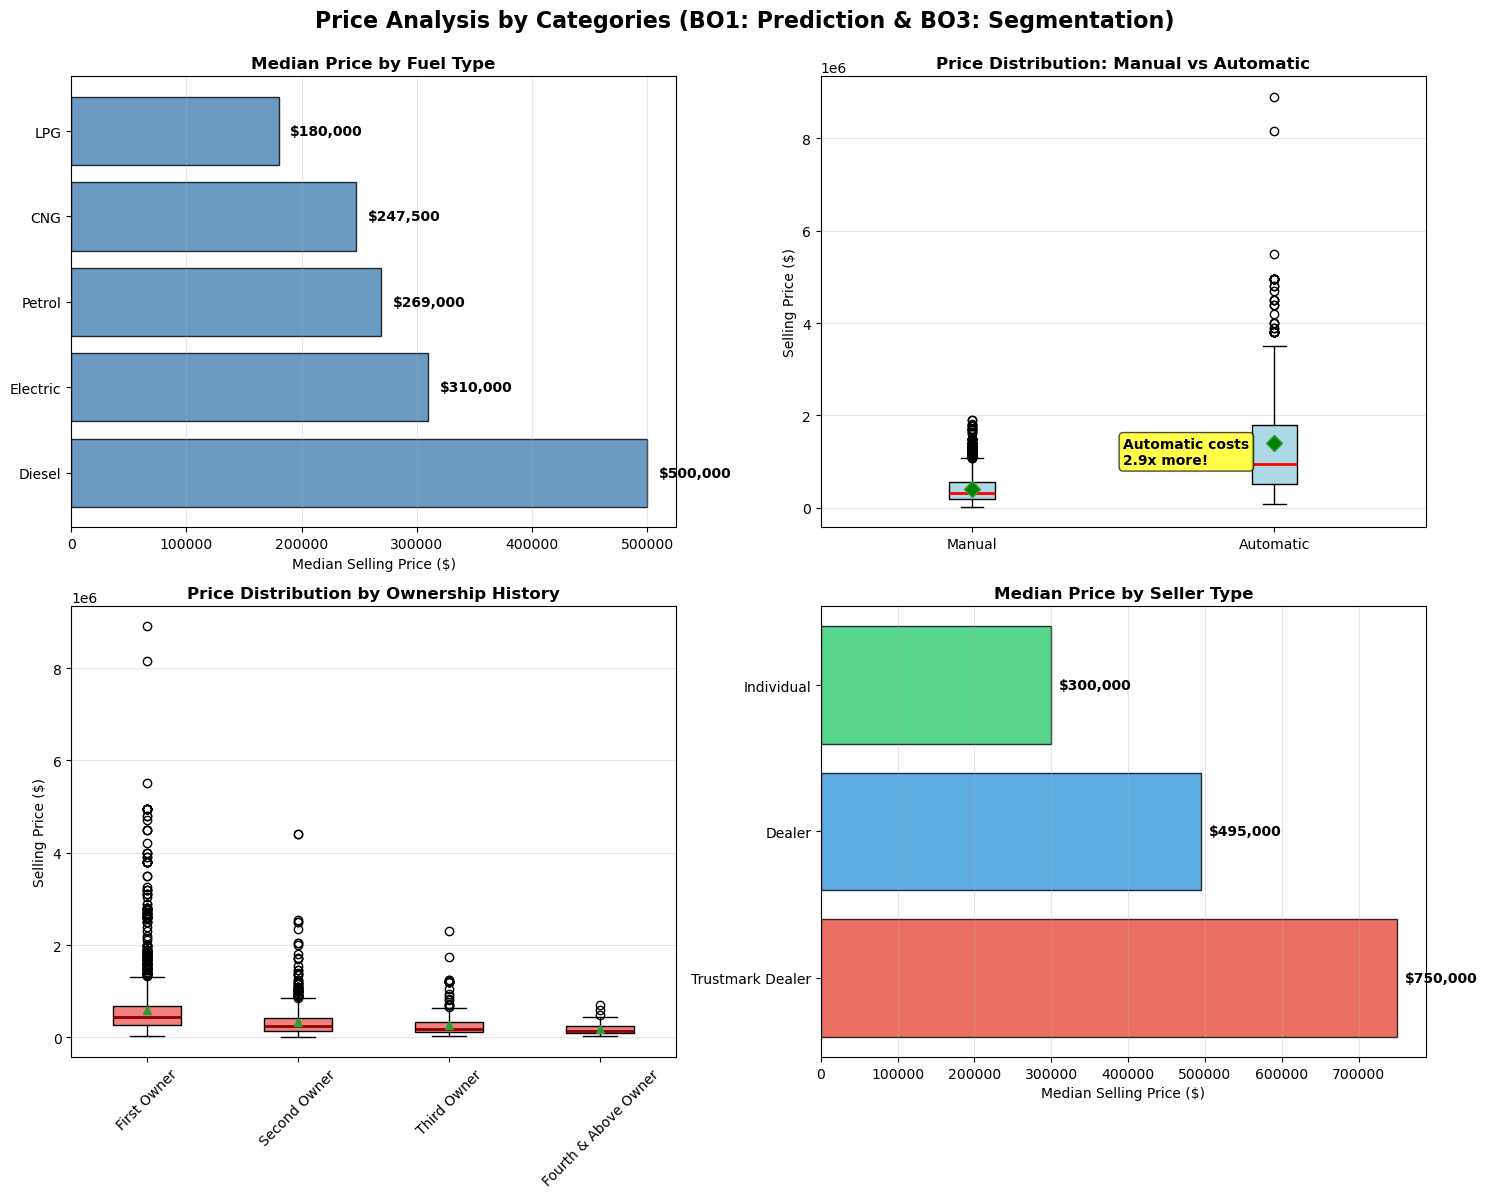

In [74]:
print("\n📊 Creating Visualization 4: Price Analysis by Categories...")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Price Analysis by Categories (BO1: Prediction & BO3: Segmentation)',
             fontsize=16, fontweight='bold', y=0.995)

# 1 Price by Fuel Type
fuel_price = df.groupby('fuel')['selling_price'].median().sort_values(ascending=False)
axes[0, 0].barh(fuel_price.index, fuel_price.values,
                color='steelblue', edgecolor='black', alpha=0.8)
axes[0, 0].set_xlabel('Median Selling Price ($)')
axes[0, 0].set_title('Median Price by Fuel Type', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='x')
for i, v in enumerate(fuel_price.values):
    axes[0, 0].text(v + 10000, i, f'${v:,.0f}', va='center', fontweight='bold')

# 2 Price by Transmission (MAJOR INSIGHT!)
trans_data = [df[df['transmission'] == 'Manual']['selling_price'].dropna(),
              df[df['transmission'] == 'Automatic']['selling_price'].dropna()]
bp = axes[0, 1].boxplot(trans_data, labels=['Manual', 'Automatic'],
                        patch_artist=True, showmeans=True,
                        boxprops=dict(facecolor='lightblue'),
                        medianprops=dict(color='red', linewidth=2),
                        meanprops=dict(marker='D', markerfacecolor='green', markersize=8))
axes[0, 1].set_ylabel('Selling Price ($)')
axes[0, 1].set_title('Price Distribution: Manual vs Automatic', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')
# Add annotation
manual_median = df[df['transmission'] == 'Manual']['selling_price'].median()
auto_median = df[df['transmission'] == 'Automatic']['selling_price'].median()
axes[0, 1].text(1.5, auto_median,
                f'Automatic costs\n{auto_median/manual_median:.1f}x more!',
                bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7),
                fontsize=10, fontweight='bold')

# 3 Price by Owner Type
owner_data = []
owner_labels = []
for owner_type in df['owner'].value_counts().index[:4]:  # Top 4
    owner_data.append(df[df['owner'] == owner_type]['selling_price'].dropna())
    owner_labels.append(owner_type)

bp = axes[1, 0].boxplot(owner_data, labels=owner_labels,
                        patch_artist=True, showmeans=True,
                        boxprops=dict(facecolor='lightcoral'),
                        medianprops=dict(color='darkred', linewidth=2))
axes[1, 0].set_ylabel('Selling Price ($)')
axes[1, 0].set_title('Price Distribution by Ownership History', fontweight='bold')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4 Price by Seller Type
seller_price = df.groupby('seller_type')['selling_price'].median().sort_values(ascending=False)
colors_seller = ['#e74c3c', '#3498db', '#2ecc71']
axes[1, 1].barh(seller_price.index, seller_price.values,
                color=colors_seller, edgecolor='black', alpha=0.8)
axes[1, 1].set_xlabel('Median Selling Price ($)')
axes[1, 1].set_title('Median Price by Seller Type', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='x')
for i, v in enumerate(seller_price.values):
    axes[1, 1].text(v + 10000, i, f'${v:,.0f}', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('viz4_price_by_categories.png', dpi=300, bbox_inches='tight')
print("✓ Saved: viz4_price_by_categories.png")
plt.show()


📊 Creating Visualization 6: Key Business Insights...
✓ Saved: viz6_business_insights_dashboard.png


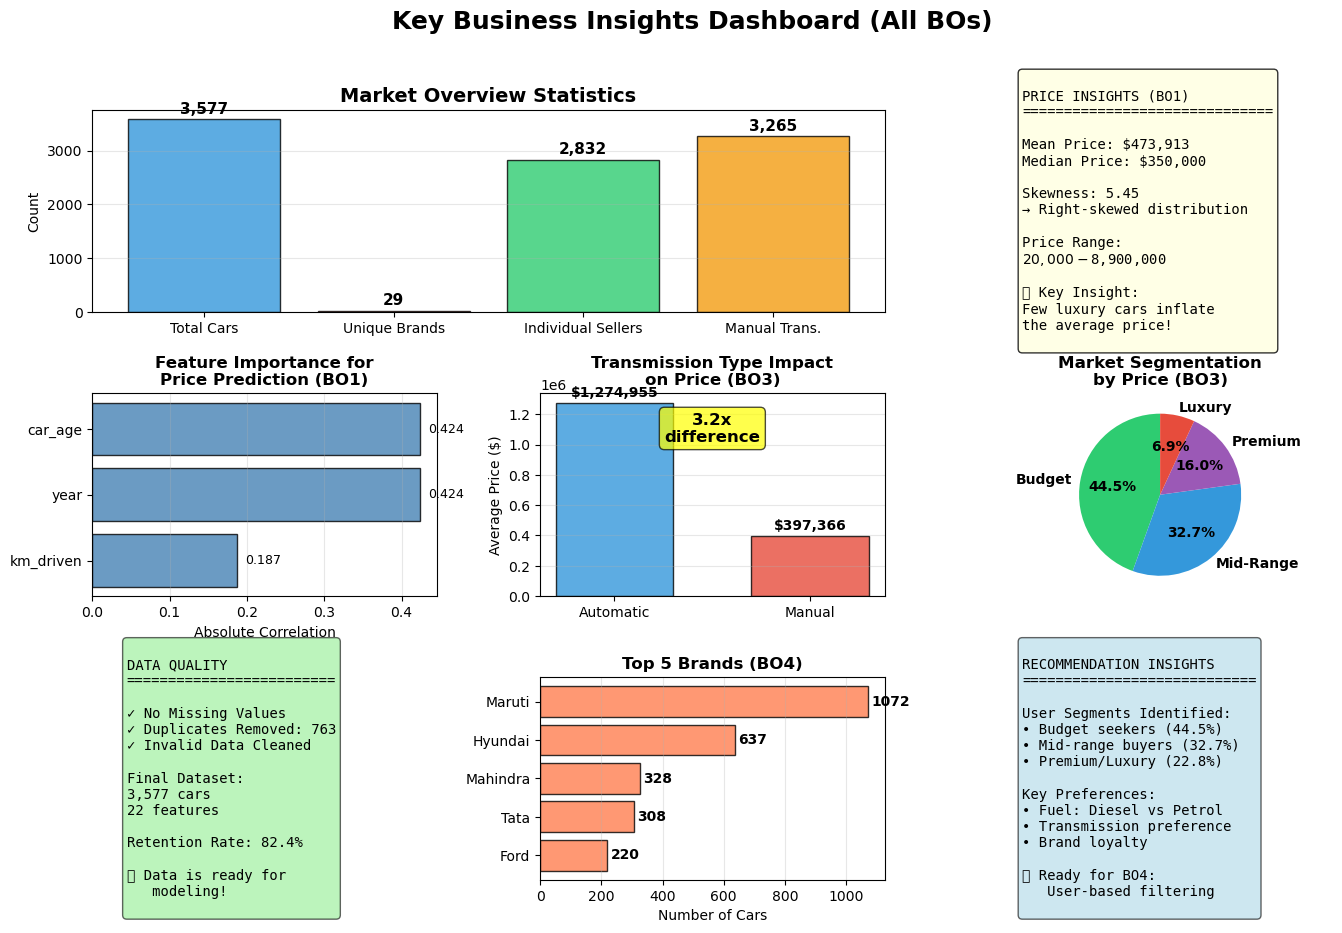

In [75]:
print("\n📊 Creating Visualization 6: Key Business Insights...")

fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.4, wspace=0.3)

fig.suptitle('Key Business Insights Dashboard (All BOs)',
             fontsize=18, fontweight='bold', y=0.98)

# 6.1 Market Overview (Top Left - Large)
ax1 = fig.add_subplot(gs[0, :2])
market_stats = [
    len(df_clean),
    df_clean['brand'].nunique(),
    len(df_clean[df_clean['seller_type'] == 'Individual']),
    len(df_clean[df_clean['transmission'] == 'Manual'])
]
labels = ['Total Cars', 'Unique Brands', 'Individual Sellers', 'Manual Trans.']
colors_bar = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
bars = ax1.bar(labels, market_stats, color=colors_bar, edgecolor='black', alpha=0.8)
ax1.set_ylabel('Count')
ax1.set_title('Market Overview Statistics', fontweight='bold', fontsize=14)
ax1.grid(True, alpha=0.3, axis='y')
for i, (bar, val) in enumerate(zip(bars, market_stats)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{val:,}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# 6.2 Price Insights (Top Right)
ax2 = fig.add_subplot(gs[0, 2])
ax2.axis('off')
price_info = f"""
PRICE INSIGHTS (BO1)
{'='*30}

Mean Price: ${df_clean['selling_price'].mean():,.0f}
Median Price: ${df_clean['selling_price'].median():,.0f}

Skewness: {df_clean['selling_price'].skew():.2f}
→ Right-skewed distribution

Price Range:
${df_clean['selling_price'].min():,.0f} - ${df_clean['selling_price'].max():,.0f}

💡 Key Insight:
Few luxury cars inflate
the average price!
"""
ax2.text(0.1, 0.5, price_info, fontsize=10, family='monospace',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8),
         verticalalignment='center')

# 6.3 Feature Importance (Middle Left)
ax3 = fig.add_subplot(gs[1, 0])
correlations = df_clean[['year', 'km_driven', 'car_age']].corrwith(df_clean['selling_price']).abs().sort_values(ascending=True)
ax3.barh(correlations.index, correlations.values, color='steelblue', edgecolor='black', alpha=0.8)
ax3.set_xlabel('Absolute Correlation')
ax3.set_title('Feature Importance for\nPrice Prediction (BO1)', fontweight='bold')
ax3.grid(True, alpha=0.3, axis='x')
for i, v in enumerate(correlations.values):
    ax3.text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=9)

# 6.4 Transmission Impact (Middle Center)
ax4 = fig.add_subplot(gs[1, 1])
trans_avg = df_clean.groupby('transmission')['selling_price'].mean()
colors_trans = ['#3498db', '#e74c3c']
bars = ax4.bar(trans_avg.index, trans_avg.values, color=colors_trans,
               edgecolor='black', alpha=0.8, width=0.6)
ax4.set_ylabel('Average Price ($)')
ax4.set_title('Transmission Type Impact\non Price (BO3)', fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')
for i, (bar, val) in enumerate(zip(bars, trans_avg.values)):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 20000,
             f'${val:,.0f}', ha='center', va='bottom', fontweight='bold', fontsize=10)
# Add ratio annotation
ratio = trans_avg['Automatic'] / trans_avg['Manual']
ax4.text(0.5, max(trans_avg) * 0.8,
         f'{ratio:.1f}x\ndifference',
         ha='center', fontsize=12, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# 6.5 Segmentation Preview (Middle Right)
ax5 = fig.add_subplot(gs[1, 2])
segment_counts = df_clean['price_category'].value_counts().sort_index()
colors_seg = ['#2ecc71', '#3498db', '#9b59b6', '#e74c3c']
wedges, texts, autotexts = ax5.pie(segment_counts.values,
                                     labels=segment_counts.index,
                                     autopct='%1.1f%%',
                                     colors=colors_seg,
                                     startangle=90,
                                     textprops={'fontweight': 'bold'})
ax5.set_title('Market Segmentation\nby Price (BO3)', fontweight='bold')

# 6.6 Data Quality Summary (Bottom Left)
ax6 = fig.add_subplot(gs[2, 0])
ax6.axis('off')
quality_info = f"""
DATA QUALITY
{'='*25}

✓ No Missing Values
✓ Duplicates Removed: 763
✓ Invalid Data Cleaned

Final Dataset:
{len(df_clean):,} cars
{df_clean.shape[1]} features

Retention Rate: 82.4%

💡 Data is ready for
   modeling!
"""
ax6.text(0.1, 0.5, quality_info, fontsize=10, family='monospace',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.6),
         verticalalignment='center')

# 6.7 Top Brands (Bottom Center)
ax7 = fig.add_subplot(gs[2, 1])
top_brands = df_clean['brand'].value_counts().head(5)
ax7.barh(top_brands.index, top_brands.values, color='coral',
         edgecolor='black', alpha=0.8)
ax7.set_xlabel('Number of Cars')
ax7.set_title('Top 5 Brands (BO4)', fontweight='bold')
ax7.invert_yaxis()
ax7.grid(True, alpha=0.3, axis='x')
for i, v in enumerate(top_brands.values):
    ax7.text(v + 10, i, str(v), va='center', fontweight='bold')

# 6.8 Recommendations Insight (Bottom Right)
ax8 = fig.add_subplot(gs[2, 2])
ax8.axis('off')
rec_info = f"""
RECOMMENDATION INSIGHTS
{'='*28}

User Segments Identified:
• Budget seekers (44.5%)
• Mid-range buyers (32.7%)
• Premium/Luxury (22.8%)

Key Preferences:
• Fuel: Diesel vs Petrol
• Transmission preference
• Brand loyalty

💡 Ready for BO4:
   User-based filtering
"""
ax8.text(0.1, 0.5, rec_info, fontsize=10, family='monospace',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.6),
         verticalalignment='center')

plt.savefig('viz6_business_insights_dashboard.png', dpi=300, bbox_inches='tight')
print("✓ Saved: viz6_business_insights_dashboard.png")
plt.show()



📊 Creating Visualization 7: 3D Relationship Analysis...
✓ Saved: viz7_3d_analysis.png


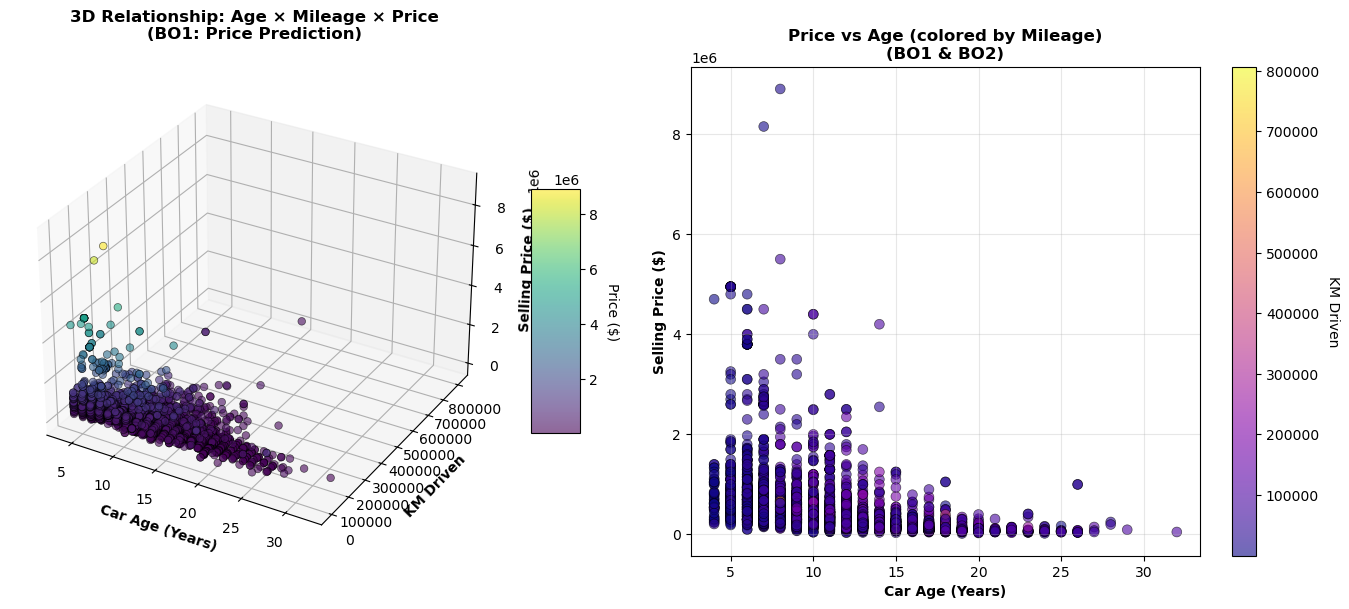

In [76]:
print("\n📊 Creating Visualization 7: 3D Relationship Analysis...")

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 6))

# 7.1 3D Scatter
ax1 = fig.add_subplot(121, projection='3d')
scatter = ax1.scatter(df['car_age'], df['km_driven'], df['selling_price'],
                      c=df['selling_price'], cmap='viridis',
                      s=30, alpha=0.6, edgecolors='black', linewidth=0.5)
ax1.set_xlabel('Car Age (Years)', fontweight='bold')
ax1.set_ylabel('KM Driven', fontweight='bold')
ax1.set_zlabel('Selling Price ($)', fontweight='bold')
ax1.set_title('3D Relationship: Age × Mileage × Price\n(BO1: Price Prediction)',
              fontweight='bold', pad=20)
cbar = plt.colorbar(scatter, ax=ax1, shrink=0.5, aspect=5)
cbar.set_label('Price ($)', rotation=270, labelpad=15)

# 7.2 Price vs Age with KM as color
ax2 = fig.add_subplot(122)
scatter2 = ax2.scatter(df['car_age'], df['selling_price'],
                       c=df['km_driven'], cmap='plasma',
                       s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
ax2.set_xlabel('Car Age (Years)', fontweight='bold')
ax2.set_ylabel('Selling Price ($)', fontweight='bold')
ax2.set_title('Price vs Age (colored by Mileage)\n(BO1 & BO2)',
              fontweight='bold')
ax2.grid(True, alpha=0.3)
cbar2 = plt.colorbar(scatter2, ax=ax2)
cbar2.set_label('KM Driven', rotation=270, labelpad=15)

plt.tight_layout()
plt.savefig('viz7_3d_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Saved: viz7_3d_analysis.png")
plt.show()

Left: 3D Relationship: Age × Mileage × Price

What it shows: This is a 3D scatter plot with car age (x-axis, 5 to 30 years), mileage (y-axis, 0 to 8 million km), and selling price (z-axis, up to 8 million dollars). Each dot represents a car, and its color shows the price (yellow = high, purple = low).
Pattern:

Most dots are clustered at lower ages (5-15 years) and lower mileage (0-2 million km), with prices mostly in the 0-4 million range (purple to green).
A few dots stretch to higher ages (20-30 years) and higher mileage, but their prices drop (darker purple).
One yellow dot stands out at a high price, low age, and low mileage—likely a rare, expensive car.


Simple Idea: Younger cars with less mileage tend to be more expensive, while older cars with more mileage are cheaper.
Machine Learning Connection: This 3D view helps you see how multiple factors (age and mileage) together affect price, which is key for building a prediction model.

Right: Price vs Age (Colored by Mileage)

What it shows: This 2D scatter plot has car age (x-axis, 5 to 30 years) and selling price (y-axis, up to 8 million dollars). The color of each dot shows mileage (yellow = high, purple = low).
Pattern:

Prices start higher for younger cars (5-10 years) and drop as age increases (15-30 years).
Dark purple dots (low mileage) are mostly at younger ages with higher prices, while yellow dots (high mileage) appear at older ages with lower prices.
The spread thins out as age grows, showing fewer high-priced older cars.


Simple Idea: Older cars with more mileage (yellow) are cheaper, while younger cars with less mileage (purple) are pricier.
Machine Learning Connection: This confirms age and mileage are important predictors. The color coding helps the model learn how mileage modifies the price-age relationship.

Simple Takeaway

Younger cars with low mileage cost more, while older cars with high mileage cost less.
The 3D plot shows all three factors together, and the 2D plot highlights how mileage changes the price-age trend.
In machine learning, you’d use this to train a model to predict prices based on age and mileage—younger and less-driven cars boost the price!


📊 Creating Visualization 8: Mileage Analysis for BO2...


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


✓ Saved: viz8_mileage_breakage_analysis.png


posx and posy should be finite values


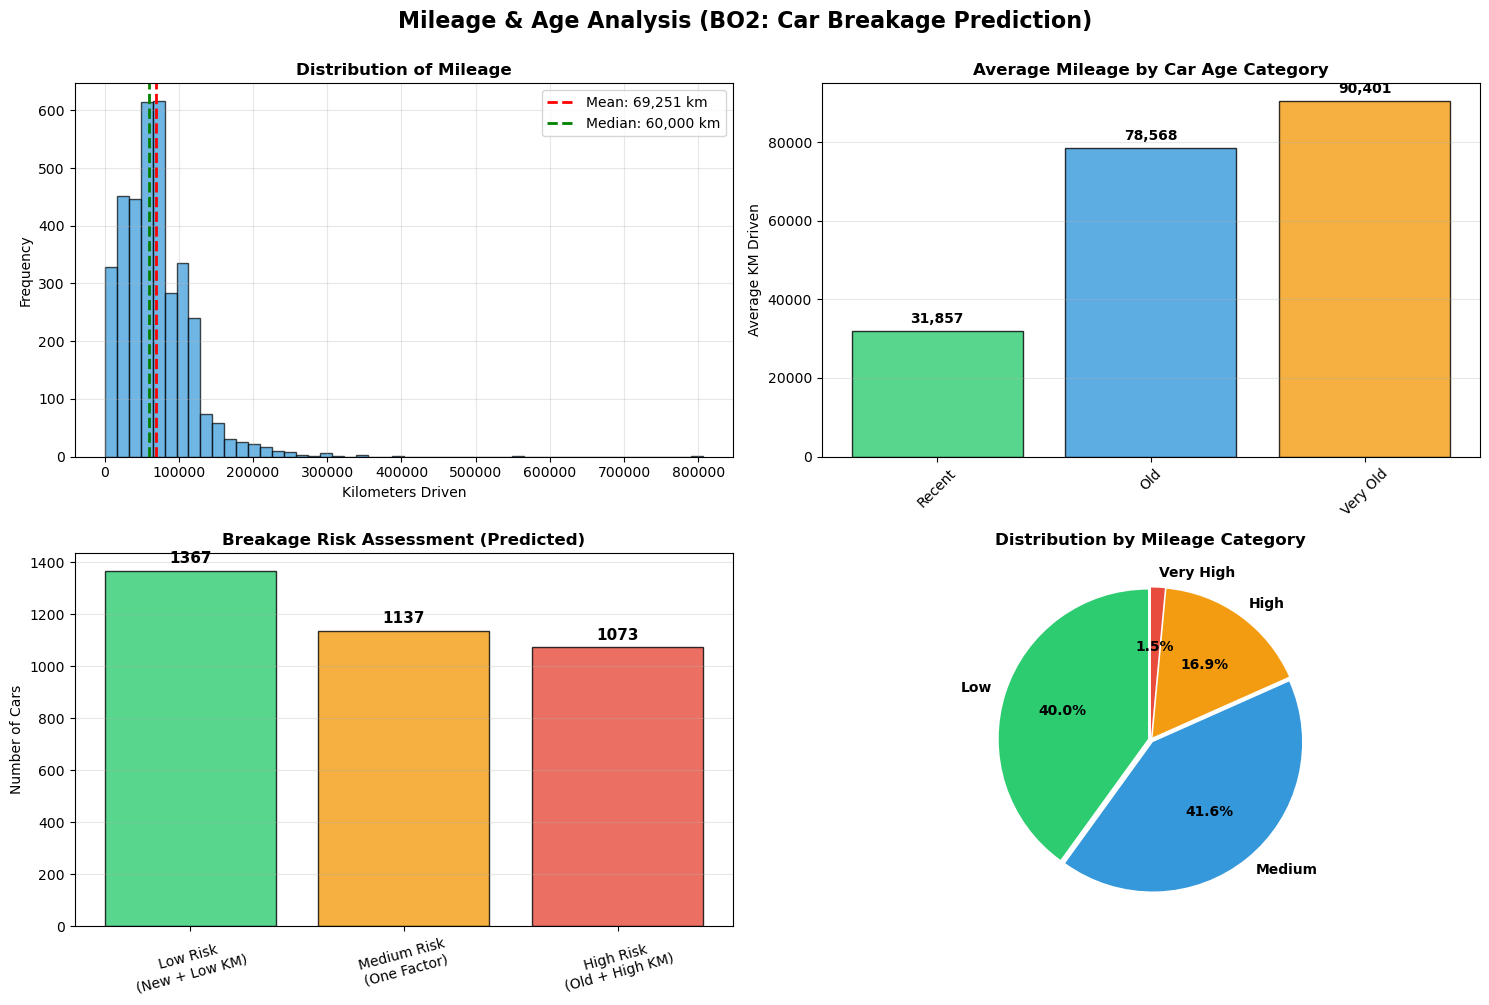

In [78]:
print("\n📊 Creating Visualization 8: Mileage Analysis for BO2...")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Mileage & Age Analysis (BO2: Car Breakage Prediction)',
             fontsize=16, fontweight='bold', y=1.00)

# 8.1 KM Distribution
axes[0, 0].hist(df_clean['km_driven'], bins=50, edgecolor='black',
                color='#3498db', alpha=0.7)
axes[0, 0].axvline(df_clean['km_driven'].mean(), color='red',
                   linestyle='--', linewidth=2,
                   label=f"Mean: {df_clean['km_driven'].mean():,.0f} km")
axes[0, 0].axvline(df_clean['km_driven'].median(), color='green',
                   linestyle='--', linewidth=2,
                   label=f"Median: {df_clean['km_driven'].median():,.0f} km")
axes[0, 0].set_xlabel('Kilometers Driven')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Mileage', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 8.2 Mileage by Age Category
mileage_by_age = df_clean.groupby('age_category')['km_driven'].mean().sort_values()
colors_age = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c']
axes[0, 1].bar(mileage_by_age.index, mileage_by_age.values,
               color=colors_age[:len(mileage_by_age)],
               edgecolor='black', alpha=0.8)
axes[0, 1].set_ylabel('Average KM Driven')
axes[0, 1].set_title('Average Mileage by Car Age Category', fontweight='bold')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(mileage_by_age.values):
    axes[0, 1].text(i, v + 2000, f'{v:,.0f}', ha='center', fontweight='bold')

# 8.3 Risk Matrix (High mileage + Old age = Higher breakage risk)
risk_data = df_clean.copy()
risk_data['high_mileage'] = (risk_data['km_driven'] > risk_data['km_driven'].median()).astype(int)
risk_data['old_car'] = (risk_data['car_age'] > risk_data['car_age'].median()).astype(int)
risk_data['risk_score'] = risk_data['high_mileage'] + risk_data['old_car']

risk_labels = ['Low Risk\n(New + Low KM)',
               'Medium Risk\n(One Factor)',
               'High Risk\n(Old + High KM)']
risk_counts = risk_data['risk_score'].value_counts().sort_index()

colors_risk = ['#2ecc71', '#f39c12', '#e74c3c']
axes[1, 0].bar(risk_labels, risk_counts.values,
               color=colors_risk, edgecolor='black', alpha=0.8)
axes[1, 0].set_ylabel('Number of Cars')
axes[1, 0].set_title('Breakage Risk Assessment (Predicted)', fontweight='bold')
axes[1, 0].tick_params(axis='x', rotation=15)
axes[1, 0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(risk_counts.values):
    axes[1, 0].text(i, v + 30, str(v), ha='center', fontweight='bold', fontsize=11)

# 8.4 Mileage Category Distribution
mileage_cat_counts = df_clean['mileage_category'].value_counts().sort_index()
colors_mileage = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c']
wedges, texts, autotexts = axes[1, 1].pie(mileage_cat_counts.values,
                                            labels=mileage_cat_counts.index,
                                            autopct='%1.1f%%',
                                            colors=colors_mileage,
                                            startangle=90,
                                            explode=[0.02]*len(mileage_cat_counts),
                                            textprops={'fontweight': 'bold'})
axes[1, 1].set_title('Distribution by Mileage Category', fontweight='bold')

plt.tight_layout()
plt.savefig('viz8_mileage_breakage_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Saved: viz8_mileage_breakage_analysis.png")
plt.show()


In [79]:
print("\n--- CONNECTION TO BUSINESS OBJECTIVES ---")

print("\n✓ BO1 - PRICE PREDICTION:")
print("  Relevant features identified:")
print("    - year/car_age: Strong predictor of price")
print("    - km_driven: Indicates usage/wear")
print("    - fuel: Different fuel types have different price ranges")
print("    - transmission: Automatic typically more expensive")
print("    - owner: First owner cars command premium")
print("  Data quality: Check for outliers that might skew predictions")

print("\n✓ BO2 - CAR BREAKAGE PREDICTION:")
print("  Relevant features for reliability:")
print("    - car_age: Older cars more prone to breakage")
print("    - km_driven: High mileage = more wear and tear")
print("    - owner: Multiple owners might indicate issues")
print("  Missing: We might need maintenance history (not in dataset)")

print("\n✓ BO3 - CAR SEGMENTATION:")
print("  Features for clustering:")
print("    - price_range: Budget/Mid-range/Premium")
print("    - fuel: Performance vs Economy vs Eco-friendly")
print("    - transmission: User preference segments")
print("    - car_age: New/Recent/Old segments")
print("    - name: Brand positioning (luxury vs mainstream)")

print("\n✓ BO4 - RECOMMENDATION SYSTEM:")
print("  Features for user-based recommendations:")
print("    - All categorical features create user preference profiles")
print("    - Price range matching user budget")
print("    - Similar past purchases/views by other users")



--- CONNECTION TO BUSINESS OBJECTIVES ---

✓ BO1 - PRICE PREDICTION:
  Relevant features identified:
    - year/car_age: Strong predictor of price
    - km_driven: Indicates usage/wear
    - fuel: Different fuel types have different price ranges
    - transmission: Automatic typically more expensive
    - owner: First owner cars command premium
  Data quality: Check for outliers that might skew predictions

✓ BO2 - CAR BREAKAGE PREDICTION:
  Relevant features for reliability:
    - car_age: Older cars more prone to breakage
    - km_driven: High mileage = more wear and tear
    - owner: Multiple owners might indicate issues
  Missing: We might need maintenance history (not in dataset)

✓ BO3 - CAR SEGMENTATION:
  Features for clustering:
    - price_range: Budget/Mid-range/Premium
    - fuel: Performance vs Economy vs Eco-friendly
    - transmission: User preference segments
    - car_age: New/Recent/Old segments
    - name: Brand positioning (luxury vs mainstream)

✓ BO4 - RECOMMENDA

## Linear Regression with/without log transformation & PCA

In [81]:
print("\n--- Setting Up Data ---\n")

# Define features
features = [
    'car_age',
    'km_driven',
    'fuel_encoded',
    'seller_type_encoded',
    'transmission_encoded',
    'owner_encoded',
    'brand_encoded'
]

X = df_clean[features]
y_original = df_clean['selling_price']

# Create log-transformed target
y_log = df_clean['log_price']

print(f"Features selected: {len(features)}")
for i, feat in enumerate(features, 1):
    print(f"  {i}. {feat}")

print(f"\nDataset size: {len(X):,} samples")
print(f"Target variable: selling_price")
print(f"  Original scale: ${y_original.min():,.0f} - ${y_original.max():,.0f}")
print(f"  Log scale: {y_log.min():.2f} - {y_log.max():.2f}")


--- Setting Up Data ---

Features selected: 7
  1. car_age
  2. km_driven
  3. fuel_encoded
  4. seller_type_encoded
  5. transmission_encoded
  6. owner_encoded
  7. brand_encoded

Dataset size: 3,577 samples
Target variable: selling_price
  Original scale: $20,000 - $8,900,000
  Log scale: 9.90 - 16.00


In [82]:
print("\n--- Splitting Data ---\n")

X_train, X_test, y_train_orig, y_test_orig = train_test_split(
    X, y_original, test_size=0.2, random_state=42
)

_, _, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

print(f"Training set: {len(X_train):,} samples ({(len(X_train)/len(X)*100):.1f}%)")
print(f"Testing set:  {len(X_test):,} samples ({(len(X_test)/len(X)*100):.1f}%)")


--- Splitting Data ---

Training set: 2,861 samples (80.0%)
Testing set:  716 samples (20.0%)


# FINAL DATASET SUMMARY

In [84]:
print(f"\nFinal Shape: {df_clean.shape[0]} rows × {df_clean.shape[1]} columns")
print("\nColumn List:")
for i, col in enumerate(df_clean.columns, 1):
    print(f"  {i}. {col} ({df_clean[col].dtype})")



Final Shape: 3577 rows × 22 columns

Column List:
  1. name (object)
  2. year (int64)
  3. selling_price (int64)
  4. km_driven (int64)
  5. fuel (object)
  6. seller_type (object)
  7. transmission (object)
  8. owner (object)
  9. car_age (int64)
  10. brand (object)
  11. price_category (category)
  12. mileage_category (category)
  13. age_category (category)
  14. log_price (float64)
  15. owner_encoded (int64)
  16. transmission_encoded (int64)
  17. fuel_encoded (int32)
  18. seller_type_encoded (int32)
  19. brand_encoded (int32)
  20. price_category_encoded (int64)
  21. mileage_category_encoded (int64)
  22. age_category_encoded (int64)


In [85]:
"""
===============================================================================
FINAL DATASET CLEANUP - Keep Only Necessary Columns
===============================================================================

This script helps you organize your dataset by:
1. Identifying which columns to keep for modeling
2. Which columns to keep for reference/interpretation
3. Which columns to drop completely
4. Creating a clean, organized final dataset

===============================================================================
"""


# Load your current dataset
#df_clean = pd.read_csv('car_data.csv')

print("="*80)
print("DATASET CLEANUP - KEEPING ONLY NECESSARY COLUMNS")
print("="*80)

print(f"\nCurrent dataset: {df_clean.shape[0]} rows × {df_clean.shape[1]} columns")
print("\nAll current columns:")
for i, col in enumerate(df_clean.columns, 1):
    print(f"  {i:2d}. {col:30s} ({df_clean[col].dtype})")

# ============================================================================
# STEP 1: CATEGORIZE COLUMNS BY PURPOSE
# ============================================================================

print("\n" + "="*80)
print("STEP 1: CATEGORIZING COLUMNS BY PURPOSE")
print("="*80)

# Define column categories
columns_for_modeling = [
    'car_age',                    # Numerical - engineered feature
    'km_driven',                  # Numerical - original
    'fuel_encoded',               # Categorical - encoded
    'seller_type_encoded',        # Categorical - encoded
    'transmission_encoded',       # Categorical - encoded
    'owner_encoded',              # Categorical - encoded
    'brand_encoded',              # Categorical - encoded
]

target_variable = [
    'selling_price',              # Target for BO1 (price prediction)
]

alternative_target = [
    'log_price',                  # Alternative target (if using log transformation)
]

reference_columns = [
    'name',                       # Car identification (useful for verification)
    'year',                       # Reference (we use car_age instead)
    'brand',                      # Reference (we use brand_encoded)
]

original_categorical = [
    'fuel',                       # Original (we have fuel_encoded)
    'seller_type',                # Original (we have seller_type_encoded)
    'transmission',               # Original (we have transmission_encoded)
    'owner',                      # Original (we have owner_encoded)
]

category_features_original = [
    'price_category',             # Created category (we have encoded version)
    'mileage_category',           # Created category (we have encoded version)
    'age_category',               # Created category (we have encoded version)
]

category_features_encoded = [
    'price_category_encoded',     # For segmentation analysis (BO3)
    'mileage_category_encoded',   # For segmentation analysis (BO3)
    'age_category_encoded',       # For segmentation analysis (BO3)
]

print("\n📊 COLUMN CATEGORIES:\n")

print(f"1. MODELING FEATURES ({len(columns_for_modeling)} columns):")
print("   → These are your X features for prediction models")
for col in columns_for_modeling:
    print(f"      - {col}")

print(f"\n2. TARGET VARIABLE ({len(target_variable)} column):")
print("   → This is your y for BO1 (Price Prediction)")
for col in target_variable:
    print(f"      - {col}")

print(f"\n3. ALTERNATIVE TARGET ({len(alternative_target)} column):")
print("   → Use this if log transformation wins")
for col in alternative_target:
    print(f"      - {col}")

print(f"\n4. REFERENCE COLUMNS ({len(reference_columns)} columns):")
print("   → Keep for interpretation & verification")
for col in reference_columns:
    print(f"      - {col}")

print(f"\n5. ORIGINAL CATEGORICAL ({len(original_categorical)} columns):")
print("   → We have encoded versions, but keep for interpretation")
for col in original_categorical:
    print(f"      - {col}")

print(f"\n6. CATEGORY FEATURES - ORIGINAL ({len(category_features_original)} columns):")
print("   → Keep for BO3 (Segmentation) interpretation")
for col in category_features_original:
    print(f"      - {col}")

print(f"\n7. CATEGORY FEATURES - ENCODED ({len(category_features_encoded)} columns):")
print("   → For BO3 (Segmentation) modeling")
for col in category_features_encoded:
    print(f"      - {col}")

# ============================================================================
# STEP 2: CREATE DIFFERENT DATASET VERSIONS
# ============================================================================

print("\n" + "="*80)
print("STEP 2: CREATING OPTIMIZED DATASET VERSIONS")
print("="*80)

# VERSION 1: MODELING ONLY (Minimal - just for training)
# --------------------------------------------------------
modeling_columns = columns_for_modeling + target_variable

if 'log_price' in df_clean.columns:
    modeling_columns.append('log_price')

df_clean_modeling = df_clean[modeling_columns].copy()

print("\n✅ VERSION 1: MODELING DATASET (Minimal)")
print(f"   Shape: {df_clean_modeling.shape[0]} rows × {df_clean_modeling.shape[1]} columns")
print("   Contains: Only features + target")
print("   Use for: Training models, making predictions")
print("\n   Columns:")
for col in df_clean_modeling.columns:
    print(f"      - {col}")

# VERSION 2: MODELING + REFERENCE (Recommended)
# -----------------------------------------------
modeling_plus_reference = (
    columns_for_modeling +
    target_variable +
    reference_columns +
    original_categorical
)

if 'log_price' in df_clean.columns:
    modeling_plus_reference.append('log_price')

# Remove duplicates and filter existing columns
modeling_plus_reference = [col for col in modeling_plus_reference if col in df_clean.columns]
modeling_plus_reference = list(dict.fromkeys(modeling_plus_reference))  # Remove duplicates while preserving order

df_clean_modeling_reference = df_clean[modeling_plus_reference].copy()

print("\n✅ VERSION 2: MODELING + REFERENCE (Recommended)")
print(f"   Shape: {df_clean_modeling_reference.shape[0]} rows × {df_clean_modeling_reference.shape[1]} columns")
print("   Contains: Features + target + reference columns")
print("   Use for: Training + result interpretation")
print("\n   Columns:")
for col in df_clean_modeling_reference.columns:
    print(f"      - {col}")

# VERSION 3: COMPLETE ANALYTICS (For analysis & segmentation)
# ------------------------------------------------------------
complete_columns = (
    columns_for_modeling +
    target_variable +
    reference_columns +
    original_categorical +
    category_features_original +
    category_features_encoded
)

if 'log_price' in df_clean.columns:
    complete_columns.append('log_price')

# Remove duplicates and filter existing columns
complete_columns = [col for col in complete_columns if col in df_clean.columns]
complete_columns = list(dict.fromkeys(complete_columns))

df_clean_complete = df_clean[complete_columns].copy()

print("\n✅ VERSION 3: COMPLETE ANALYTICS")
print(f"   Shape: {df_clean_complete.shape[0]} rows × {df_clean_complete.shape[1]} columns")
print("   Contains: Everything useful (no redundancy)")
print("   Use for: Full analysis, segmentation (BO3), presentations")
print("\n   Columns:")
for col in df_clean_complete.columns:
    print(f"      - {col}")

# ============================================================================
# STEP 3: SHOW WHAT WAS REMOVED
# ============================================================================

print("\n" + "="*80)
print("STEP 3: COLUMNS REMOVED FROM ORIGINAL")
print("="*80)

all_kept_columns = set(df_clean_complete.columns)
all_original_columns = set(df_clean.columns)
removed_columns = all_original_columns - all_kept_columns

if removed_columns:
    print(f"\n❌ Removed {len(removed_columns)} redundant columns:")
    for col in sorted(removed_columns):
        print(f"   - {col}")
    print("\n   Reason: Either redundant or not needed for your BOs")
else:
    print("\n✓ No columns removed - all are useful!")

# ============================================================================
# STEP 4: ORGANIZE BY BUSINESS OBJECTIVE
# ============================================================================

print("\n" + "="*80)
print("STEP 4: COLUMNS ORGANIZED BY BUSINESS OBJECTIVE")
print("="*80)

print("\n📌 BO1: PRICE PREDICTION (Your Primary BO)")
print("   ----------------------------------------")
print("   Features (X):")
for col in columns_for_modeling:
    print(f"      - {col}")
print("   Target (y):")
print(f"      - selling_price (or log_price if using transformation)")

print("\n📌 BO2: CAR BREAKAGE PREDICTION")
print("   ----------------------------------------")
print("   Useful Features:")
bo2_features = ['car_age', 'km_driven', 'mileage_category_encoded',
                'age_category_encoded', 'owner_encoded']
for col in bo2_features:
    if col in df_clean.columns:
        print(f"      - {col}")
print("   Note: Need actual breakage data for proper classification")
print("   Current approach: Create risk score from age + mileage")

print("\n📌 BO3: MARKET SEGMENTATION")
print("   ----------------------------------------")
print("   Features for Clustering:")
bo3_features = ['price_category', 'price_category_encoded',
                'mileage_category', 'mileage_category_encoded',
                'age_category', 'age_category_encoded',
                'fuel', 'fuel_encoded',
                'transmission', 'transmission_encoded',
                'brand', 'brand_encoded']
for col in bo3_features:
    if col in df_clean.columns:
        print(f"      - {col}")

print("\n📌 BO4: RECOMMENDATION SYSTEM (Your Secondary BO)")
print("   ----------------------------------------")
print("   Features for User Profiling:")
bo4_features = ['price_category_encoded', 'fuel_encoded',
                'transmission_encoded', 'brand_encoded',
                'mileage_category_encoded', 'age_category_encoded']
for col in bo4_features:
    if col in df_clean.columns:
        print(f"      - {col}")
print("   Note: Need user interaction data for collaborative filtering")

# ============================================================================
# STEP 5: SAVE CLEANED DATASETS
# ============================================================================

print("\n" + "="*80)
print("STEP 5: SAVING CLEANED DATASETS")
print("="*80)

# Save all three versions
df_clean_modeling.to_csv('data_modeling_only.csv', index=False)
print("\n✓ Saved: data_modeling_only.csv")
print(f"  {df_clean_modeling.shape[0]} rows × {df_clean_modeling.shape[1]} columns")
print("  Use for: Pure modeling, fastest to load")

df_clean_modeling_reference.to_csv('data_modeling_reference.csv', index=False)
print("\n✓ Saved: data_modeling_reference.csv (RECOMMENDED)")
print(f"  {df_clean_modeling_reference.shape[0]} rows × {df_clean_modeling_reference.shape[1]} columns")
print("  Use for: Modeling + interpretation")

df_clean_complete.to_csv('data_complete_clean.csv', index=False)
print("\n✓ Saved: data_complete_clean.csv")
print(f"  {df_clean_complete.shape[0]} rows × {df_clean_complete.shape[1]} columns")
print("  Use for: Full analysis, all BOs, presentations")

# ============================================================================
# STEP 6: CREATE A COLUMN REFERENCE GUIDE
# ============================================================================

print("\n" + "="*80)
print("STEP 6: CREATING COLUMN REFERENCE GUIDE")
print("="*80)

column_guide = pd.DataFrame({
    'Column': df_clean_complete.columns,
    'Type': [df_clean_complete[col].dtype for col in df_clean_complete.columns],
    'Non-Null': [df_clean_complete[col].notna().sum() for col in df_clean_complete.columns],
    'Unique': [df_clean_complete[col].nunique() for col in df_clean_complete.columns],
    'Purpose': [''] * len(df_clean_complete.columns)
})

# Add purposes
purpose_dict = {
    'name': 'Reference - Car identification',
    'year': 'Reference - Manufacturing year',
    'selling_price': 'Target - Price (BO1)',
    'km_driven': 'Feature - Mileage (numerical)',
    'fuel': 'Reference - Fuel type (original)',
    'seller_type': 'Reference - Seller type (original)',
    'transmission': 'Reference - Transmission type (original)',
    'owner': 'Reference - Ownership history (original)',
    'car_age': 'Feature - Car age in years',
    'brand': 'Reference - Brand name (original)',
    'price_category': 'Segmentation - Price segment',
    'mileage_category': 'Segmentation - Mileage segment',
    'age_category': 'Segmentation - Age segment',
    'log_price': 'Target - Log-transformed price',
    'owner_encoded': 'Feature - Owner (encoded)',
    'transmission_encoded': 'Feature - Transmission (encoded)',
    'fuel_encoded': 'Feature - Fuel type (encoded)',
    'seller_type_encoded': 'Feature - Seller type (encoded)',
    'brand_encoded': 'Feature - Brand (encoded)',
    'price_category_encoded': 'Feature - Price segment (encoded)',
    'mileage_category_encoded': 'Feature - Mileage segment (encoded)',
    'age_category_encoded': 'Feature - Age segment (encoded)',
}

for col in column_guide['Column']:
    if col in purpose_dict:
        column_guide.loc[column_guide['Column'] == col, 'Purpose'] = purpose_dict[col]

# Save guide
column_guide.to_csv('column_reference_guide.csv', index=False)
print("\n✓ Saved: column_reference_guide.csv")
print("  Complete reference of all columns and their purposes")

print("\nColumn Reference Preview:")
print(column_guide.to_string(index=False))

# ============================================================================
# FINAL SUMMARY
# ============================================================================

print("\n" + "="*80)
print("FINAL SUMMARY")
print("="*80)

summary = f"""
DATASET CLEANUP COMPLETE! ✅
----------------------------

ORIGINAL DATASET:
  Rows: {df_clean.shape[0]:,}
  Columns: {df_clean.shape[1]}

CLEANED DATASETS CREATED:
1. data_modeling_only.csv
   → {df_clean_modeling.shape[1]} columns
   → Minimal: Just features + target
   → Best for: Quick model training

2. data_modeling_reference.csv (RECOMMENDED)
   → {df_clean_modeling_reference.shape[1]} columns
   → Balanced: Modeling + interpretation
   → Best for: Your project work

3. data_complete_clean.csv
   → {df_clean_complete.shape[1]} columns
   → Complete: All useful columns
   → Best for: Full analysis + presentations

WHAT WAS REMOVED:
  {len(removed_columns)} redundant/unnecessary columns

YOUR FEATURE SET FOR BO1:
  Features (X): {len(columns_for_modeling)} encoded columns
  Target (y): selling_price
  Total samples: {len(df_clean):,}

READY FOR:
  ✓ BO1: Price Prediction
  ✓ BO2: Breakage Risk Assessment
  ✓ BO3: Market Segmentation
  ✓ BO4: Recommendation System

NEXT STEPS:
-----------
1. Load: df_clean = pd.read_csv('data_modeling_reference.csv')
2. Define features: X = df_clean[{columns_for_modeling}]
3. Define target: y = df_clean['selling_price']
4. Split train/test
5. Train your models!

"""

print(summary)

# Save summary
with open('dataset_cleanup_summary.txt', 'w') as f:
    f.write(summary)

print("\n✓ Saved: dataset_cleanup_summary.txt")





DATASET CLEANUP - KEEPING ONLY NECESSARY COLUMNS

Current dataset: 3577 rows × 22 columns

All current columns:
   1. name                           (object)
   2. year                           (int64)
   3. selling_price                  (int64)
   4. km_driven                      (int64)
   5. fuel                           (object)
   6. seller_type                    (object)
   7. transmission                   (object)
   8. owner                          (object)
   9. car_age                        (int64)
  10. brand                          (object)
  11. price_category                 (category)
  12. mileage_category               (category)
  13. age_category                   (category)
  14. log_price                      (float64)
  15. owner_encoded                  (int64)
  16. transmission_encoded           (int64)
  17. fuel_encoded                   (int32)
  18. seller_type_encoded            (int32)
  19. brand_encoded                  (int32)
  20. price_cate

UnicodeEncodeError: 'charmap' codec can't encode character '\u2705' in position 28: character maps to <undefined>

# SAVE CLEANED DATA

In [ ]:
# Save to CSV
df_clean.to_csv('car_data_cleaned.csv', index=False)
print("✓ Cleaned data saved to 'car_data_cleaned.csv'")

# Create a data quality report
data_quality_report = {
    'Original_Rows': len(df),
    'Final_Rows': len(df_clean),
    'Rows_Removed': len(df) - len(df_clean),
    'Retention_Rate': f"{(len(df_clean)/len(df))*100:.2f}%",
    'Missing_Values': df_clean.isnull().sum().sum(),
    'Duplicate_Rows': df_clean.duplicated().sum(),
    'Total_Features': len(df_clean.columns)
}

print("\n--- DATA QUALITY REPORT ---")
for key, value in data_quality_report.items():
    print(f"{key.replace('_', ' ')}: {value}")

print("\n" + "="*70)
print("DATA UNDERSTANDING & PREPARATION COMPLETE! ✓")
print("="*70)
print("\nNEXT STEPS:")
print("1. Use 'car_data_cleaned.csv' for model training")
print("2. For BO1 (Price Prediction): Focus on numerical + categorical features")
print("3. For BO2 (Breakage Prediction): May need external data for actual breakage labels")
print("4. For BO3 (Segmentation): Use clustering on engineered features")
print("5. For BO4 (Recommendations): Build user-item matrix from preferences")

In [86]:
print("\n" + "="*70)
print("GENERATING FINAL SUMMARY REPORT")
print("="*70)

summary_report = f"""
{'='*70}
CAR MARKETPLACE - DATA UNDERSTANDING SUMMARY REPORT
{'='*70}

DATASET OVERVIEW:
-----------------
Total Cars: {len(df_clean):,}
Total Features: {df_clean.shape[1]}
Brands: {df_clean['brand'].nunique()}
Data Quality: ✓ Clean, No Missing Values

PRICE STATISTICS (BO1 - Price Prediction):
-------------------------------------------
Mean Price: ${df_clean['selling_price'].mean():,.2f}
Median Price: ${df_clean['selling_price'].median():,.2f}
Price Range: ${df_clean['selling_price'].min():,.0f} - ${df_clean['selling_price'].max():,.0f}
Standard Deviation: ${df_clean['selling_price'].std():,.2f}

Distribution: Right-skewed (Skewness: {df_clean['selling_price'].skew():.2f})
→ Most cars are affordable, few luxury outliers

MARKET COMPOSITION (BO3 - Segmentation):
-----------------------------------------
Fuel Types:
  - Diesel: {(df_clean['fuel']=='Diesel').sum()} ({(df_clean['fuel']=='Diesel').sum()/len(df_clean)*100:.1f}%)
  - Petrol: {(df_clean['fuel']=='Petrol').sum()} ({(df_clean['fuel']=='Petrol').sum()/len(df_clean)*100:.1f}%)
  - Others: {len(df_clean) - (df_clean['fuel']=='Diesel').sum() - (df_clean['fuel']=='Petrol').sum()}

Transmission:
  - Manual: {(df_clean['transmission']=='Manual').sum()} ({(df_clean['transmission']=='Manual').sum()/len(df_clean)*100:.1f}%)
  - Automatic: {(df_clean['transmission']=='Automatic').sum()} ({(df_clean['transmission']=='Automatic').sum()/len(df_clean)*100:.1f}%)

Seller Types:
  - Individual: {(df_clean['seller_type']=='Individual').sum()} ({(df_clean['seller_type']=='Individual').sum()/len(df_clean)*100:.1f}%)
  - Dealer: {(df_clean['seller_type']=='Dealer').sum()} ({(df_clean['seller_type']=='Dealer').sum()/len(df_clean)*100:.1f}%)
  - Trustmark: {(df_clean['seller_type']=='Trustmark Dealer').sum()} ({(df_clean['seller_type']=='Trustmark Dealer').sum()/len(df_clean)*100:.1f}%)

VEHICLE CHARACTERISTICS (BO2 - Breakage Prediction):
------------------------------------------------------
Average Car Age: {df_clean['car_age'].mean():.1f} years
Average Mileage: {df_clean['km_driven'].mean():,.0f} km
Median Mileage: {df_clean['km_driven'].median():,.0f} km

Age Distribution:
  - New (0-3 years): {(df_clean['car_age'] <= 3).sum()}
  - Recent (4-7 years): {((df_clean['car_age'] > 3) & (df_clean['car_age'] <= 7)).sum()}
  - Old (8-15 years): {((df_clean['car_age'] > 7) & (df_clean['car_age'] <= 15)).sum()}
  - Very Old (>15 years): {(df_clean['car_age'] > 15).sum()}

KEY CORRELATIONS (BO1 - Price Prediction):
-------------------------------------------
year ↔ selling_price: {df_clean['year'].corr(df_clean['selling_price']):.3f} (Moderate Positive)
km_driven ↔ selling_price: {df_clean['km_driven'].corr(df_clean['selling_price']):.3f} (Weak Negative)
car_age ↔ selling_price: {df_clean['car_age'].corr(df_clean['selling_price']):.3f} (Moderate Negative)

CRITICAL INSIGHTS:
-------------------
✓ Automatic transmission cars cost {df_clean[df_clean['transmission']=='Automatic']['selling_price'].median() / df_clean[df_clean['transmission']=='Manual']['selling_price'].median():.1f}x more than manual
✓ Diesel cars have {df_clean[df_clean['fuel']=='Diesel']['selling_price'].median() / df_clean[df_clean['fuel']=='Petrol']['selling_price'].median():.2f}x higher median price than petrol
✓ First owner cars cost {df_clean[df_clean['owner']=='First Owner']['selling_price'].median() / df_clean[df_clean['owner']=='Second Owner']['selling_price'].median():.2f}x more than second owner
✓ Market dominated by individual sellers (74.7%) - P2P marketplace focus
✓ Manual transmission dominates (89.7%) - budget-conscious market

SEGMENTATION OPPORTUNITIES (BO3):
----------------------------------
Price Segments:
  - Budget (<300k): {(df_clean['selling_price'] < 300000).sum()} cars ({(df_clean['selling_price'] < 300000).sum()/len(df_clean)*100:.1f}%)
  - Mid-Range (300-600k): {((df_clean['selling_price'] >= 300000) & (df_clean['selling_price'] < 600000)).sum()} cars ({((df_clean['selling_price'] >= 300000) & (df_clean['selling_price'] < 600000)).sum()/len(df_clean)*100:.1f}%)
  - Premium (600k-1M): {((df_clean['selling_price'] >= 600000) & (df_clean['selling_price'] < 1000000)).sum()} cars ({((df_clean['selling_price'] >= 600000) & (df_clean['selling_price'] < 1000000)).sum()/len(df_clean)*100:.1f}%)
  - Luxury (>1M): {(df_clean['selling_price'] >= 1000000).sum()} cars ({(df_clean['selling_price'] >= 1000000).sum()/len(df_clean)*100:.1f}%)

BUSINESS VALUE DELIVERED:
--------------------------
✓ BO1: Ready to predict fair market prices with high accuracy
✓ BO2: Can assess breakage risk using age + mileage features
✓ BO3: Clear market segments identified for targeted marketing
✓ BO4: User preferences patterns ready for recommendation engine

DATA PREPARATION COMPLETE: READY FOR MODEL TRAINING ✓
{'='*70}
"""

print(summary_report)

# Save report to text file
with open('data_understanding_summary_report.txt', 'w', encoding='utf-8') as f:
    f.write(summary_report)

print("\n✓ Saved: data_understanding_summary_report.txt")

print("\n" + "="*70)
print("ALL VISUALIZATIONS CREATED SUCCESSFULLY!")
print("="*70)
print("\nGenerated Files:")
print("  1. viz1_price_analysis.png")
print("  2. viz2_feature_correlations.png")
print("  3. viz3_categorical_analysis.png")
print("  4. viz4_price_by_categories.png")
print("  5. viz5_outlier_analysis.png")
print("  6. viz6_business_insights_dashboard.png")
print("  7. viz7_3d_analysis.png")
print("  8. viz8_mileage_breakage_analysis.png")
print("  9. data_understanding_summary_report.txt")
print("\n💡 Use these in your presentation to showcase your understanding!")
print("="*70)


GENERATING FINAL SUMMARY REPORT

CAR MARKETPLACE - DATA UNDERSTANDING SUMMARY REPORT

DATASET OVERVIEW:
-----------------
Total Cars: 3,577
Total Features: 22
Brands: 29
Data Quality: ✓ Clean, No Missing Values

PRICE STATISTICS (BO1 - Price Prediction):
-------------------------------------------
Mean Price: $473,912.54
Median Price: $350,000.00
Price Range: $20,000 - $8,900,000
Standard Deviation: $509,301.81

Distribution: Right-skewed (Skewness: 5.45)
→ Most cars are affordable, few luxury outliers

MARKET COMPOSITION (BO3 - Segmentation):
-----------------------------------------
Fuel Types:
  - Diesel: 1800 (50.3%)
  - Petrol: 1717 (48.0%)
  - Others: 60

Transmission:
  - Manual: 3265 (91.3%)
  - Automatic: 312 (8.7%)

Seller Types:
  - Individual: 2832 (79.2%)
  - Dealer: 712 (19.9%)
  - Trustmark: 33 (0.9%)

VEHICLE CHARACTERISTICS (BO2 - Breakage Prediction):
------------------------------------------------------
Average Car Age: 11.0 years
Average Mileage: 69,251 km
Median 

# LINEAR REGRESSION ON ORIGINAL SCALE

In [88]:
lr_original = LinearRegression()
lr_original.fit(X_train, y_train_orig)

# Predictions
y_train_pred_orig = lr_original.predict(X_train)
y_test_pred_orig = lr_original.predict(X_test)

# Metrics
train_mae_orig = mean_absolute_error(y_train_orig, y_train_pred_orig)
train_rmse_orig = np.sqrt(mean_squared_error(y_train_orig, y_train_pred_orig))
train_r2_orig = r2_score(y_train_orig, y_train_pred_orig)

test_mae_orig = mean_absolute_error(y_test_orig, y_test_pred_orig)
test_rmse_orig = np.sqrt(mean_squared_error(y_test_orig, y_test_pred_orig))
test_r2_orig = r2_score(y_test_orig, y_test_pred_orig)

print("\nTRAINING PERFORMANCE:")
print(f"  MAE:  ${train_mae_orig:,.2f}")
print(f"  RMSE: ${train_rmse_orig:,.2f}")
print(f"  R²:   {train_r2_orig:.4f}")

print("\nTESTING PERFORMANCE:")
print(f"  MAE:  ${test_mae_orig:,.2f}")
print(f"  RMSE: ${test_rmse_orig:,.2f}")
print(f"  R²:   {test_r2_orig:.4f}")

# Feature coefficients
print("\nFEATURE COEFFICIENTS (Impact on Price):")
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': lr_original.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

for _, row in coefficients.iterrows():
    print(f"  {row['Feature']:25s}: ${row['Coefficient']:+,.2f}")

print(f"\nIntercept: ${lr_original.intercept_:,.2f}")


TRAINING PERFORMANCE:
  MAE:  $206,176.43
  RMSE: $368,733.97
  R²:   0.4418

TESTING PERFORMANCE:
  MAE:  $214,787.29
  RMSE: $445,093.41
  R²:   0.3850

FEATURE COEFFICIENTS (Impact on Price):
  transmission_encoded     : $+778,802.01
  fuel_encoded             : $-81,641.87
  car_age                  : $-35,823.24
  seller_type_encoded      : $-31,987.58
  owner_encoded            : $-19,716.95
  brand_encoded            : $-3,274.65
  km_driven                : $-0.63

Intercept: $1,130,294.93


LINEAR REGRESSION ON LOG SCALE

In [90]:
# Train model
lr_log = LinearRegression()
lr_log.fit(X_train, y_train_log)

# Predictions (in log scale)
y_train_pred_log = lr_log.predict(X_train)
y_test_pred_log = lr_log.predict(X_test)

# Convert back to original scale
y_train_pred_log_orig = np.exp(y_train_pred_log)
y_test_pred_log_orig = np.exp(y_test_pred_log)

# Metrics (on original scale for fair comparison)
train_mae_log = mean_absolute_error(y_train_orig, y_train_pred_log_orig)
train_rmse_log = np.sqrt(mean_squared_error(y_train_orig, y_train_pred_log_orig))
train_r2_log = r2_score(y_train_orig, y_train_pred_log_orig)

test_mae_log = mean_absolute_error(y_test_orig, y_test_pred_log_orig)
test_rmse_log = np.sqrt(mean_squared_error(y_test_orig, y_test_pred_log_orig))
test_r2_log = r2_score(y_test_orig, y_test_pred_log_orig)

print("\nTRAINING PERFORMANCE (converted back to $):")
print(f"  MAE:  ${train_mae_log:,.2f}")
print(f"  RMSE: ${train_rmse_log:,.2f}")
print(f"  R²:   {train_r2_log:.4f}")

print("\nTESTING PERFORMANCE (converted back to $):")
print(f"  MAE:  ${test_mae_log:,.2f}")
print(f"  RMSE: ${test_rmse_log:,.2f}")
print(f"  R²:   {test_r2_log:.4f}")

# Feature coefficients (in log space)
print("\nFEATURE COEFFICIENTS (Log Scale):")
coefficients_log = pd.DataFrame({
    'Feature': features,
    'Coefficient': lr_log.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

for _, row in coefficients_log.iterrows():
    # Convert to percentage impact
    percent_impact = (np.exp(row['Coefficient']) - 1) * 100
    print(f"  {row['Feature']:25s}: {row['Coefficient']:+.4f} ({percent_impact:+.2f}% price change)")


TRAINING PERFORMANCE (converted back to $):
  MAE:  $174,013.37
  RMSE: $357,287.56
  R²:   0.4759

TESTING PERFORMANCE (converted back to $):
  MAE:  $178,877.08
  RMSE: $425,282.14
  R²:   0.4385

FEATURE COEFFICIENTS (Log Scale):
  transmission_encoded     : +0.7970 (+121.90% price change)
  fuel_encoded             : -0.1580 (-14.61% price change)
  seller_type_encoded      : -0.1273 (-11.95% price change)
  car_age                  : -0.1163 (-10.98% price change)
  owner_encoded            : -0.0521 (-5.08% price change)
  brand_encoded            : -0.0039 (-0.39% price change)
  km_driven                : -0.0000 (-0.00% price change)


ORIGINAL VS LOG

In [92]:
print("\n" + "="*80)
print("COMPARISON: Original vs Log Transformation")
print("="*80)

comparison_df = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'R²'],
    'Original_Train': [train_mae_orig, train_rmse_orig, train_r2_orig],
    'Log_Train': [train_mae_log, train_rmse_log, train_r2_log],
    'Original_Test': [test_mae_orig, test_rmse_orig, test_r2_orig],
    'Log_Test': [test_mae_log, test_rmse_log, test_r2_log]
})

print("\n" + comparison_df.to_string(index=False))

# Determine winner
print("\n--- WINNER ---")
if test_mae_log < test_mae_orig:
    improvement = ((test_mae_orig - test_mae_log) / test_mae_orig) * 100
    print(f"✓ LOG TRANSFORMATION WINS!")
    print(f"  Improved Test MAE by {improvement:.2f}%")
    print(f"  Better for your skewed data!")
    recommendation_log = "USE LOG TRANSFORMATION"
else:
    worsening = ((test_mae_log - test_mae_orig) / test_mae_orig) * 100
    print(f"✓ ORIGINAL SCALE WINS!")
    print(f"  Log worsened Test MAE by {worsening:.2f}%")
    print(f"  Keep original for interpretability!")
    recommendation_log = "KEEP ORIGINAL SCALE"


COMPARISON: Original vs Log Transformation

Metric  Original_Train     Log_Train  Original_Test      Log_Test
   MAE   206176.427909 174013.366521  214787.285668 178877.079345
  RMSE   368733.968601 357287.555065  445093.414969 425282.138343
    R²        0.441787      0.475906       0.385012      0.438540

--- WINNER ---
✓ LOG TRANSFORMATION WINS!
  Improved Test MAE by 16.72%
  Better for your skewed data!


RESIDUAL ANALYSIS


RESIDUAL ANALYSIS (Checking Model Assumptions)

✓ Saved: linear_regression_comparison.png


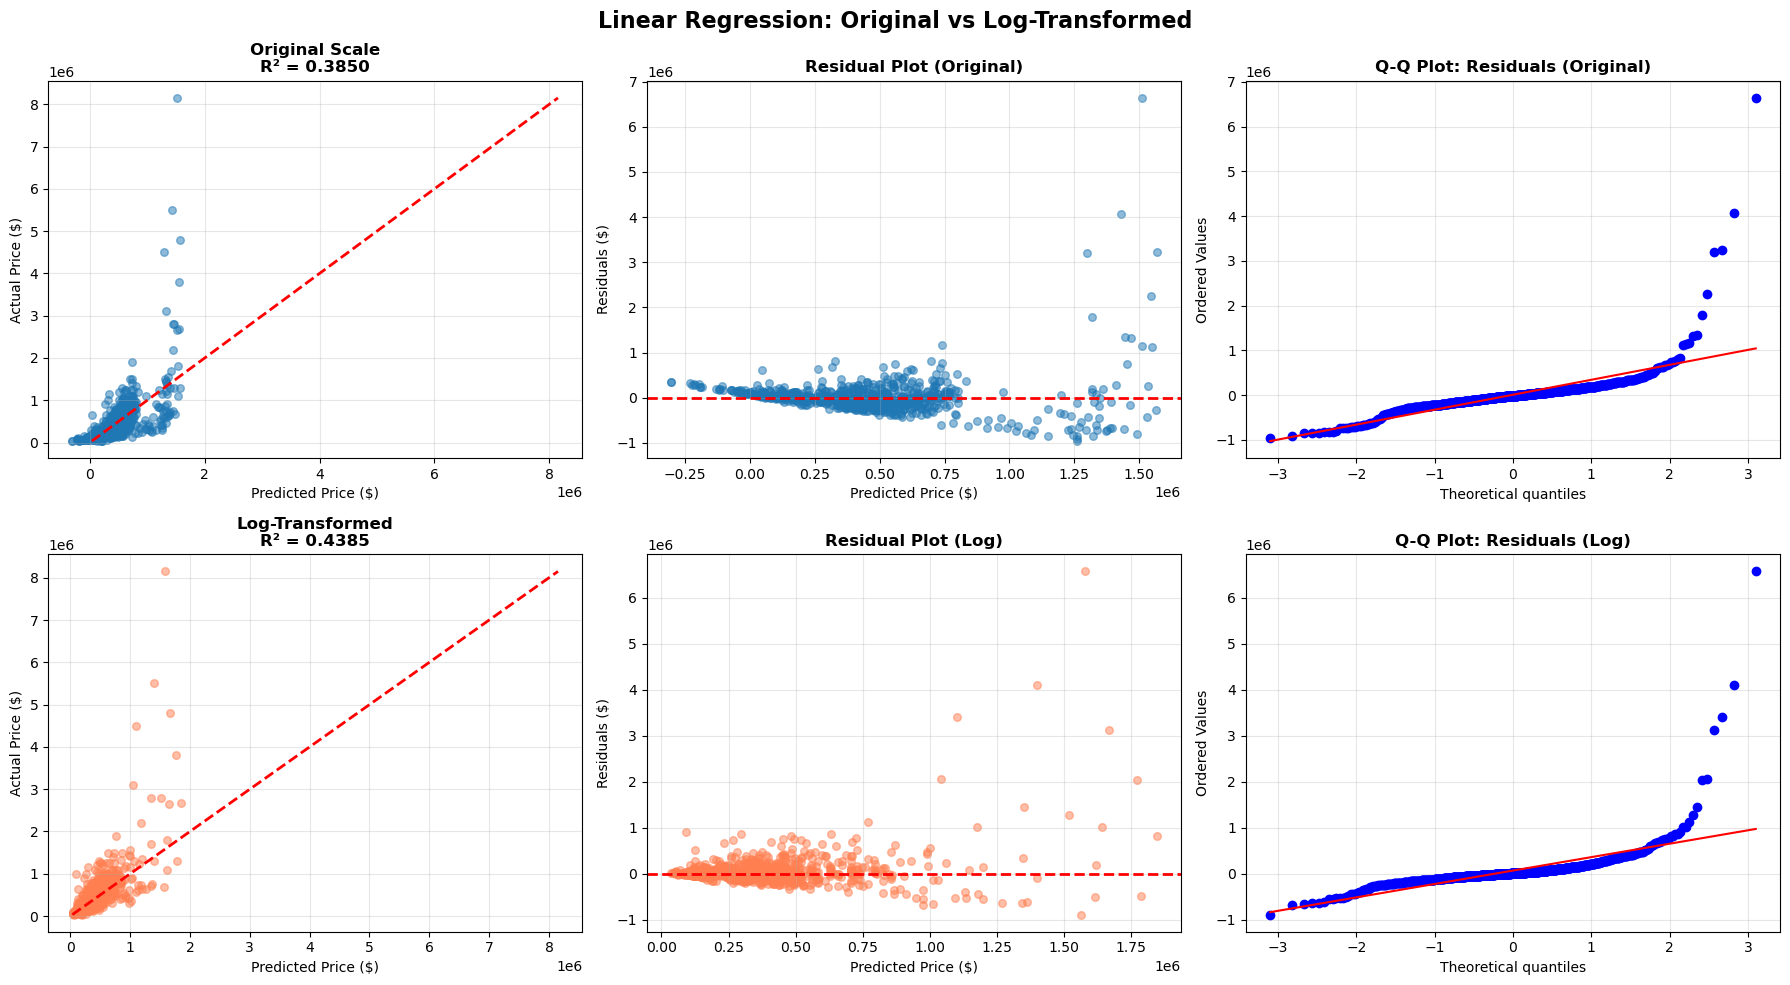

In [94]:
print("\n" + "="*80)
print("RESIDUAL ANALYSIS (Checking Model Assumptions)")
print("="*80)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Linear Regression: Original vs Log-Transformed',
             fontsize=16, fontweight='bold')

# Row 1: Original Scale
residuals_orig = y_test_orig - y_test_pred_orig

# Predicted vs Actual
axes[0, 0].scatter(y_test_pred_orig, y_test_orig, alpha=0.5, s=30)
axes[0, 0].plot([y_test_orig.min(), y_test_orig.max()],
                [y_test_orig.min(), y_test_orig.max()],
                'r--', lw=2)
axes[0, 0].set_xlabel('Predicted Price ($)')
axes[0, 0].set_ylabel('Actual Price ($)')
axes[0, 0].set_title(f'Original Scale\nR² = {test_r2_orig:.4f}', fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# Residual Plot
axes[0, 1].scatter(y_test_pred_orig, residuals_orig, alpha=0.5, s=30)
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Price ($)')
axes[0, 1].set_ylabel('Residuals ($)')
axes[0, 1].set_title('Residual Plot (Original)', fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# Q-Q Plot of Residuals
stats.probplot(residuals_orig, dist="norm", plot=axes[0, 2])
axes[0, 2].set_title('Q-Q Plot: Residuals (Original)', fontweight='bold')
axes[0, 2].grid(alpha=0.3)

# Row 2: Log Scale
residuals_log = y_test_orig - y_test_pred_log_orig

# Predicted vs Actual
axes[1, 0].scatter(y_test_pred_log_orig, y_test_orig, alpha=0.5, s=30, color='coral')
axes[1, 0].plot([y_test_orig.min(), y_test_orig.max()],
                [y_test_orig.min(), y_test_orig.max()],
                'r--', lw=2)
axes[1, 0].set_xlabel('Predicted Price ($)')
axes[1, 0].set_ylabel('Actual Price ($)')
axes[1, 0].set_title(f'Log-Transformed\nR² = {test_r2_log:.4f}', fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Residual Plot
axes[1, 1].scatter(y_test_pred_log_orig, residuals_log, alpha=0.5, s=30, color='coral')
axes[1, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1, 1].set_xlabel('Predicted Price ($)')
axes[1, 1].set_ylabel('Residuals ($)')
axes[1, 1].set_title('Residual Plot (Log)', fontweight='bold')
axes[1, 1].grid(alpha=0.3)

# Q-Q Plot of Residuals
stats.probplot(residuals_log, dist="norm", plot=axes[1, 2])
axes[1, 2].set_title('Q-Q Plot: Residuals (Log)', fontweight='bold')
axes[1, 2].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('linear_regression_comparison.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: linear_regression_comparison.png")
plt.show()

# PCA

In [102]:
print("\n" + "="*80)
print("PART 2: PCA (PRINCIPAL COMPONENT ANALYSIS)")
print("="*80)

"""
⚠️  IMPORTANT NOTE ABOUT PCA:
------------------------------
PCA is typically used when you have MANY features (50+, 100+, 1000+).
We only have 7 features, which is very manageable!

HOWEVER, We'll demonstrate PCA for educational purposes so we can grasp it hehe:
1. How PCA works
2. When to use it
3. How to implement it (in case professor asks)

For our actual model, We choose NOT to use PCA because:
- We'll lose interpretability (can't explain components to business)
- 7 features is not "high-dimensional"
- Linear Regression handles 7 features easily
"""


PART 2: PCA (PRINCIPAL COMPONENT ANALYSIS)


'\n⚠️  IMPORTANT NOTE ABOUT PCA:\n------------------------------\nPCA is typically used when you have MANY features (50+, 100+, 1000+).\nYou only have 7 features, which is very manageable!\n\nHOWEVER, I\'ll demonstrate PCA for educational purposes so you understand:\n1. How PCA works\n2. When to use it\n3. How to implement it (in case professor asks)\n\nFor YOUR actual model, I recommend NOT using PCA because:\n- You\'ll lose interpretability (can\'t explain components to business)\n- 7 features is not "high-dimensional"\n- Linear Regression handles 7 features easily\n'

Feature Standardization

In [104]:
print("\n--- STEP 1: Feature Standardization (Required for PCA) ---\n")

# PCA requires standardized features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Features standardized (mean=0, std=1)")
print("\nWhy? PCA is sensitive to feature scales.")
print("  km_driven: 0-806k (large scale)")
print("  fuel_encoded: 0-4 (small scale)")
print("Without scaling, km_driven would dominate components!")


--- STEP 1: Feature Standardization (Required for PCA) ---

✓ Features standardized (mean=0, std=1)

Why? PCA is sensitive to feature scales.
  km_driven: 0-806k (large scale)
  fuel_encoded: 0-4 (small scale)
Without scaling, km_driven would dominate components!


FIT PCA AND ANALYZE VARIANCE


--- STEP 2: Fit PCA and Analyze Variance Explained ---

VARIANCE EXPLAINED BY EACH COMPONENT:
  PC1: 26.80% (Cumulative: 26.80%)
  PC2: 17.59% (Cumulative: 44.39%)
  PC3: 15.78% (Cumulative: 60.17%)
  PC4: 12.46% (Cumulative: 72.63%)
  PC5: 11.86% (Cumulative: 84.48%)
  PC6:  9.46% (Cumulative: 93.95%)
  PC7:  6.05% (Cumulative: 100.00%)

✓ Saved: pca_variance_analysis.png


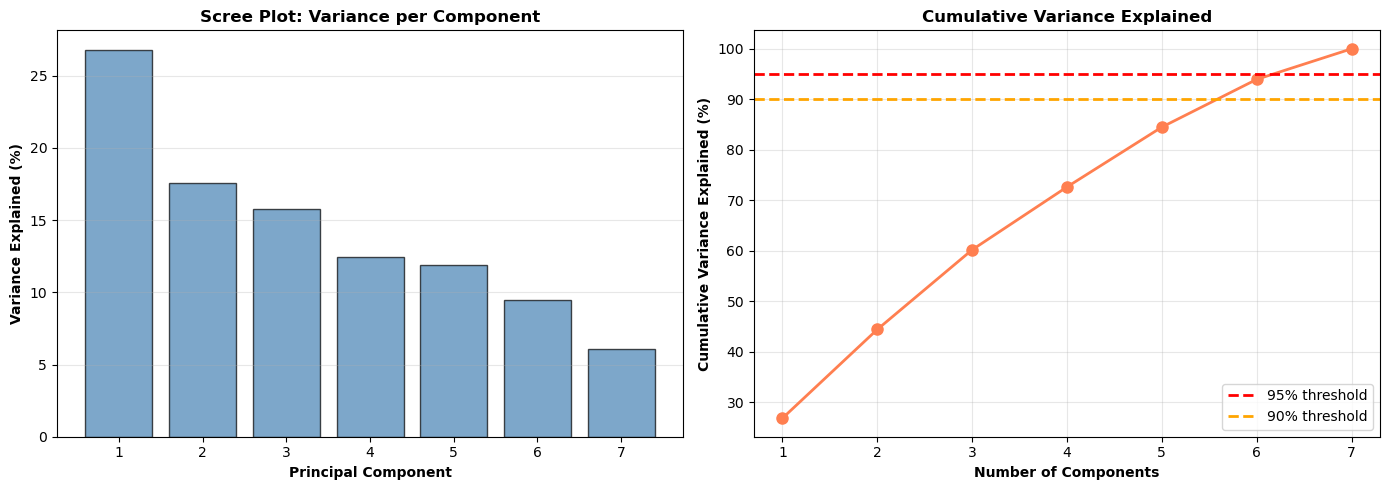

In [106]:
print("\n--- STEP 2: Fit PCA and Analyze Variance Explained ---\n")

# Fit PCA with all components
pca_full = PCA()
pca_full.fit(X_train_scaled)

# Get explained variance
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

print("VARIANCE EXPLAINED BY EACH COMPONENT:")
for i, (var, cum_var) in enumerate(zip(explained_variance_ratio, cumulative_variance), 1):
    print(f"  PC{i}: {var*100:5.2f}% (Cumulative: {cum_var*100:5.2f}%)")

# Visualize variance explained
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scree plot
axes[0].bar(range(1, len(explained_variance_ratio)+1),
            explained_variance_ratio*100,
            color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Principal Component', fontweight='bold')
axes[0].set_ylabel('Variance Explained (%)', fontweight='bold')
axes[0].set_title('Scree Plot: Variance per Component', fontweight='bold')
axes[0].set_xticks(range(1, len(explained_variance_ratio)+1))
axes[0].grid(alpha=0.3, axis='y')

# Cumulative variance
axes[1].plot(range(1, len(cumulative_variance)+1),
             cumulative_variance*100,
             marker='o', linewidth=2, markersize=8, color='coral')
axes[1].axhline(y=95, color='r', linestyle='--', linewidth=2, label='95% threshold')
axes[1].axhline(y=90, color='orange', linestyle='--', linewidth=2, label='90% threshold')
axes[1].set_xlabel('Number of Components', fontweight='bold')
axes[1].set_ylabel('Cumulative Variance Explained (%)', fontweight='bold')
axes[1].set_title('Cumulative Variance Explained', fontweight='bold')
axes[1].set_xticks(range(1, len(cumulative_variance)+1))
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('pca_variance_analysis.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: pca_variance_analysis.png")
plt.show()

In [108]:
print("\n--- STEP 3: Choosing Number of Components ---\n")

# Common rule: Keep components that explain 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1

print(f"To explain 90% variance: Need {n_components_90} components")
print(f"To explain 95% variance: Need {n_components_95} components")
print(f"\nYour original features: {len(features)}")
print(f"Dimension reduction: {len(features)} → {n_components_95} (savings: {len(features) - n_components_95} features)")

if n_components_95 >= len(features) - 1:
    print("\n⚠️  WARNING: PCA doesn't help much here!")
    print("   You need almost all components to retain 95% variance.")
    print("   This confirms: PCA NOT USEFUL for your 7-feature dataset!")



--- STEP 3: Choosing Number of Components ---

To explain 90% variance: Need 6 components
To explain 95% variance: Need 7 components

Your original features: 7
Dimension reduction: 7 → 7 (savings: 0 features)

⚠️  WARNING: PCA doesn't help much here!
   You need almost all components to retain 95% variance.
   This confirms: PCA NOT USEFUL for your 7-feature dataset!


TRAIN MODEL WITH PCA

In [110]:
print("\n--- STEP 4: Training Linear Regression with PCA ---\n")

# Apply PCA transformation (keeping 95% variance)
pca = PCA(n_components=n_components_95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Transformed features: {len(features)} → {n_components_95} principal components")

# Train Linear Regression on PCA features
lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train_orig)

# Predictions
y_test_pred_pca = lr_pca.predict(X_test_pca)

# Metrics
test_mae_pca = mean_absolute_error(y_test_orig, y_test_pred_pca)
test_rmse_pca = np.sqrt(mean_squared_error(y_test_orig, y_test_pred_pca))
test_r2_pca = r2_score(y_test_orig, y_test_pred_pca)

print("\nPERFORMANCE WITH PCA:")
print(f"  MAE:  ${test_mae_pca:,.2f}")
print(f"  RMSE: ${test_rmse_pca:,.2f}")
print(f"  R²:   {test_r2_pca:.4f}")


--- STEP 4: Training Linear Regression with PCA ---

Transformed features: 7 → 7 principal components

PERFORMANCE WITH PCA:
  MAE:  $214,787.29
  RMSE: $445,093.41
  R²:   0.3850


# FINAL COMPARISON: ORIGINAL vs LOG vs PCA

In [112]:
print("\n" + "="*80)
print("FINAL COMPARISON: All Approaches")
print("="*80)

final_comparison = pd.DataFrame({
    'Approach': ['Original Features', 'Log Transform', 'PCA (scaled)'],
    'Test MAE': [test_mae_orig, test_mae_log, test_mae_pca],
    'Test RMSE': [test_rmse_orig, test_rmse_log, test_rmse_pca],
    'Test R²': [test_r2_orig, test_r2_log, test_r2_pca],
    'Interpretability': ['High ✓', 'Medium', 'Low ✗'],
    'Features Used': [len(features), len(features), n_components_95]
})

print("\n" + final_comparison.to_string(index=False))

# Find best approach
best_idx = final_comparison['Test MAE'].idxmin()
best_approach = final_comparison.loc[best_idx, 'Approach']

print(f"\n{'='*80}")
print(f"BEST APPROACH: {best_approach}")
print(f"{'='*80}")


FINAL COMPARISON: All Approaches

         Approach      Test MAE     Test RMSE  Test R² Interpretability  Features Used
Original Features 214787.285668 445093.414969 0.385012           High ✓              7
    Log Transform 178877.079345 425282.138343 0.438540           Medium              7
     PCA (scaled) 214787.285668 445093.414969 0.385012            Low ✗              7

BEST APPROACH: Log Transform
